# Lending Club Case Study
### As part of EDA - Upgrad Assignment
#### By Group Members :- 
* Shantanu Saxena
* Vivek Goswami

## Step 1 : Import libraries

In [743]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [744]:
# for showing complete columns
pd.set_option("display.max_columns",None)

## Step 2 : Import dataset

In [745]:
# read acsv
df = pd.read_csv('loan.csv')

## Step 3 : Inspecting dataset

In [746]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [747]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [748]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [749]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [750]:
# rows * columns
df.shape

(39717, 111)

In [751]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

## Step 4 : Cleaning the data
### Step 4.1 : Missing Values

In [752]:
#check null values
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [753]:
# drop columns with null
df=df.dropna(axis=1)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,972xx,OR,17.94,0,Jan-96,0,15,0,27783,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,1,INDIVIDUAL,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,802xx,CO,11.33,0,Nov-90,0,13,0,7274,40,f,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,80.90,1,INDIVIDUAL,0,0
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,274xx,NC,6.40,1,Dec-86,1,6,0,8847,9,f,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,281.94,1,INDIVIDUAL,0,0
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,017xx,MA,2.30,0,Oct-98,0,11,0,9698,20,f,0.00,0.00,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,0.00,1,INDIVIDUAL,0,0
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,208xx,MD,3.72,0,Nov-88,0,17,0,85607,26,f,0.00,0.00,5174.198551,672.66,5000.00,174.20,0.00,0.00,0.00,0.00,1,INDIVIDUAL,0,0


In [754]:
# rows * columns - after removing columns
df.shape

(39717, 43)

### Step 4.2 : Check for Duplicates

In [755]:
# check for duplicate 
df.duplicated().sum()

0

In [756]:
df.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int 

###### 
- now it's clear we don't have any null values

### Step 4.3 : Remove values which are not required and will hamper the analysis

In [757]:
df['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 39717, dtype: object

###### Based on the above steps we have following data :-

- Fully Paid   -  32950
- Charged Off  -  5627
- Current      -  1140



###### The goal of the analysis is to see who is likely to default and this can only be said in case of either fully paid or charged off loans.
- where fully paid means amount paid, charged off means those who are defaulters and current means who are still paying
- We cannot make anything up for the current loans. 
- To exclude that data , removing the records with current loan status

In [758]:
df[df['loan_status']=='Current']

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,972xx,OR,17.94,0,Jan-96,0,15,0,27783,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.0,0.0,0.0,67.79,1,INDIVIDUAL,0,0
32,1065420,1299514,10000,10000,9975.00000,60 months,15.96%,242.97,C,C5,RENT,29120.0,Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,330xx,FL,22.83,0,Feb-97,1,11,0,16158,31,f,1849.10,1844.43,12594.24,12562.85,8150.89,4443.35,0.0,0.0,0.0,242.97,1,INDIVIDUAL,0,0
39,1069346,1304237,12500,12500,12475.00000,60 months,12.69%,282.44,B,B5,RENT,27000.0,Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,604xx,IL,16.04,0,Dec-01,3,6,0,10143,24,f,2181.42,2177.03,14636.30,14607.08,10318.58,4317.72,0.0,0.0,0.0,282.44,1,INDIVIDUAL,0,0
86,1063958,1297940,14000,14000,13975.00000,60 months,17.27%,349.98,D,D3,RENT,28000.0,Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,992xx,WA,6.34,0,Jul-05,2,5,0,6986,10,f,2637.34,2632.59,18176.96,18144.59,11362.67,6814.29,0.0,0.0,0.0,349.98,1,INDIVIDUAL,0,0
95,1068575,1303001,15300,15300,15275.00000,60 months,22.06%,423.10,F,F4,RENT,85000.0,Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,226xx,VA,20.58,0,Feb-84,2,14,0,26524,27,f,3125.79,3120.68,21988.20,21952.28,12174.21,9813.99,0.0,0.0,0.0,423.10,1,INDIVIDUAL,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15972,725556,920821,10400,10400,10400.00000,60 months,6.00%,218.99,E,E3,MORTGAGE,29000.0,Source Verified,May-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,799xx,TX,10.84,0,Nov-02,0,7,0,8696,15,f,238.82,238.82,13886.92,13886.92,10161.18,3725.74,0.0,0.0,0.0,218.99,1,INDIVIDUAL,0,0
15981,738420,935790,6000,6000,6000.00000,60 months,10.37%,128.58,B,B3,RENT,24000.0,Source Verified,Apr-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,car,142xx,NY,11.05,0,Oct-05,0,6,0,12,9,f,10.26,10.26,7701.15,7701.15,5989.74,1711.41,0.0,0.0,0.0,128.58,1,INDIVIDUAL,0,0
16361,733695,930086,19200,19200,18847.76292,60 months,10.74%,414.97,B,B4,MORTGAGE,100000.0,Verified,Apr-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,071xx,NJ,4.43,0,Jan-91,0,6,0,0,10,f,19.12,19.09,24894.24,24310.75,19180.88,5713.36,0.0,0.0,0.0,414.97,1,INDIVIDUAL,0,0
16609,728422,924106,9350,9350,9350.00000,60 months,10.00%,198.66,B,B2,RENT,66000.0,Not Verified,Apr-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,car,103xx,NY,4.84,0,Dec-01,0,4,0,88,7,f,13.28,13.28,11906.14,11906.14,9336.72,2569.42,0.0,0.0,0.0,198.66,1,INDIVIDUAL,0,0


In [759]:
# so out of 39717 row 1140 rows will be remmoved

In [760]:
# basis the above we have to drop the " current "" users because they will not make sense of the analysis we want, hence:-
df = df[df['loan_status']!='Current']
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,1,INDIVIDUAL,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,802xx,CO,11.33,0,Nov-90,0,13,0,7274,40,f,0.0,0.0,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,80.90,1,INDIVIDUAL,0,0
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,274xx,NC,6.40,1,Dec-86,1,6,0,8847,9,f,0.0,0.0,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,281.94,1,INDIVIDUAL,0,0
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,017xx,MA,2.30,0,Oct-98,0,11,0,9698,20,f,0.0,0.0,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,0.00,1,INDIVIDUAL,0,0
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,208xx,MD,3.72,0,Nov-88,0,17,0,85607,26,f,0.0,0.0,5174.198551,672.66,5000.00,174.20,0.00,0.00,0.00,0.00,1,INDIVIDUAL,0,0


In [761]:
# 39717 - 1140 = 38577 remaining rows with Fully Paid and Charged off users
len(df)

38577

In [762]:
# lets cross check the describe after removing current users
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,delinq_amnt
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.0,38577.0,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.0,38577.0,38577.0
mean,6.763787e+05,8.422843e+05,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,0.146668,0.871737,9.275423,0.055422,13289.489826,22.052648,0.0,0.0,11866.970365,11271.196153,9648.322898,2119.243370,1.368634,98.035545,12.772728,2746.243218,1.0,0.0,0.0
std,2.092639e+05,2.644519e+05,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,0.492271,1.071546,4.401588,0.237804,15866.492241,11.425861,0.0,0.0,8809.856227,8700.845592,7009.381200,2389.499511,7.315880,698.650182,150.836853,4494.648131,0.0,0.0,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0
25%,5.120330e+05,6.611310e+05,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,3650.000000,13.000000,0.0,0.0,5513.497338,5019.590000,4500.000000,643.990000,0.000000,0.000000,0.000000,217.420000,1.0,0.0,0.0
50%,6.564230e+05,8.392920e+05,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,0.000000,1.000000,9.000000,0.000000,8762.000000,20.000000,0.0,0.0,9674.048405,9066.660000,8000.000000,1300.450000,0.000000,0.000000,0.000000,568.260000,1.0,0.0,0.0
75%,8.291460e+05,1.037336e+06,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,16912.000000,29.000000,0.0,0.0,16136.952430,15329.780000,13175.000000,2671.980000,0.000000,0.000000,0.000000,3447.250000,1.0,0.0,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,0.0,0.0,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,1.0,0.0,0.0


In [763]:
# from the above steps it is clear that their is change in the describe information

In [764]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,1,INDIVIDUAL,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,802xx,CO,11.33,0,Nov-90,0,13,0,7274,40,f,0.0,0.0,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,80.90,1,INDIVIDUAL,0,0
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,274xx,NC,6.40,1,Dec-86,1,6,0,8847,9,f,0.0,0.0,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,281.94,1,INDIVIDUAL,0,0
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,017xx,MA,2.30,0,Oct-98,0,11,0,9698,20,f,0.0,0.0,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,0.00,1,INDIVIDUAL,0,0
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,208xx,MD,3.72,0,Nov-88,0,17,0,85607,26,f,0.0,0.0,5174.198551,672.66,5000.00,174.20,0.00,0.00,0.00,0.00,1,INDIVIDUAL,0,0


### Step 4.4 : check and remove nunique values

In [765]:
# let's check for nunique values
df.nunique().sort_values()

delinq_amnt                    1
application_type               1
policy_code                    1
out_prncp_inv                  1
out_prncp                      1
initial_list_status            1
acc_now_delinq                 1
pymnt_plan                     1
term                           2
loan_status                    2
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
int_rate                     370
earliest_cr_line             524
zip_code                     822
loan_amnt                    870
funded_amnt                 1019
total_rec_late_fee          1320
collection_recovery_fee     2616
dti                         2853
recoveries

In [766]:
df=df.drop(['delinq_amnt','application_type','policy_code','out_prncp_inv','out_prncp','initial_list_status','acc_now_delinq','pymnt_plan'], axis=1)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,RENT,36000.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,12,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,802xx,CO,11.33,0,Nov-90,0,13,0,7274,40,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,80.90
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,RENT,18000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,274xx,NC,6.40,1,Dec-86,1,6,0,8847,9,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,281.94
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,017xx,MA,2.30,0,Oct-98,0,11,0,9698,20,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,0.00
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,208xx,MD,3.72,0,Nov-88,0,17,0,85607,26,5174.198551,672.66,5000.00,174.20,0.00,0.00,0.00,0.00


In [767]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   member_id                38577 non-null  int64  
 2   loan_amnt                38577 non-null  int64  
 3   funded_amnt              38577 non-null  int64  
 4   funded_amnt_inv          38577 non-null  float64
 5   term                     38577 non-null  object 
 6   int_rate                 38577 non-null  object 
 7   installment              38577 non-null  float64
 8   grade                    38577 non-null  object 
 9   sub_grade                38577 non-null  object 
 10  home_ownership           38577 non-null  object 
 11  annual_inc               38577 non-null  float64
 12  verification_status      38577 non-null  object 
 13  issue_d                  38577 non-null  object 
 14  loan_status              38

### Step 4.5 : Removing more columns/ values which are not required and hamper the analysis

In [768]:
# we don't need below columns as it won't help in analysis hence deleting

df = df.drop(['id','member_id','sub_grade','url','zip_code','addr_state','delinq_2yrs','revol_bal','total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt'], axis=1)
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc,total_pymnt_inv
0,5000,5000,4975.0,36 months,10.65%,162.87,B,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,9,5833.84
1,2500,2500,2500.0,60 months,15.27%,59.83,C,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,4,1008.71
2,2400,2400,2400.0,36 months,15.96%,84.33,C,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,10,3005.67
3,10000,10000,10000.0,36 months,13.49%,339.31,C,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,37,12231.89
5,5000,5000,5000.0,36 months,7.90%,156.46,A,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,12,5632.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07%,78.42,A,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,11.33,Nov-90,0,13,0,40,1213.88
39713,8500,8500,875.0,36 months,10.28%,275.38,C,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,6.40,Dec-86,1,6,0,9,1020.51
39714,5000,5000,1325.0,36 months,8.07%,156.84,A,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,2.30,Oct-98,0,11,0,20,1397.12
39715,5000,5000,650.0,36 months,7.43%,155.38,A,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,3.72,Nov-88,0,17,0,26,672.66


### Step 4.6 : Missing Values

In [769]:
# missing values
(df.isna().sum()/len(df.index))*100

loan_amnt              0.0
funded_amnt            0.0
funded_amnt_inv        0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
dti                    0.0
earliest_cr_line       0.0
inq_last_6mths         0.0
open_acc               0.0
pub_rec                0.0
total_acc              0.0
total_pymnt_inv        0.0
dtype: float64

######
- we have no missing values, which is clear from above step

### Step 4.7 : Convert data type as per requirement and remove un-necessary details

In [770]:
# checking the data type and bring data to one particular dtypes
df.dtypes

loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate                object
installment            float64
grade                   object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
dti                    float64
earliest_cr_line        object
inq_last_6mths           int64
open_acc                 int64
pub_rec                  int64
total_acc                int64
total_pymnt_inv        float64
dtype: object

###### checking int_rate column

In [771]:
df['int_rate']

0        10.65%
1        15.27%
2        15.96%
3        13.49%
5         7.90%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 38577, dtype: object

###### removing % from int_rate for numerical values

In [772]:
df.int_rate=pd.to_numeric(df.int_rate.apply(lambda remove : remove.split('%')[0]))

In [773]:
df['int_rate'].value_counts()

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: count, Length: 370, dtype: int64

###### checking term column

In [774]:
df.term

0         36 months
1         60 months
2         36 months
3         36 months
5         36 months
            ...    
39712     36 months
39713     36 months
39714     36 months
39715     36 months
39716     36 months
Name: term, Length: 38577, dtype: object

###### removing 'months' from term for numerical values

In [775]:
df.term = pd.to_numeric(df.term.apply(lambda remove : remove.split(' months')[0]))

In [776]:
df['term'].value_counts()

term
36    29096
60     9481
Name: count, dtype: int64

###### change data types based on data values in the columns

In [777]:
# loan_amnt - converting to float data type
df = df.astype({'loan_amnt':'float'})
df['loan_amnt']

0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: loan_amnt, Length: 38577, dtype: float64

In [778]:
# funded_amnt - converting to float data type
df = df.astype({'funded_amnt':'float'})
df['funded_amnt']

0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: funded_amnt, Length: 38577, dtype: float64

In [779]:
# earliest_cr_line - converting to date time format
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line, format='%b-%y')
df['earliest_cr_line']

0       1985-01-01
1       1999-04-01
2       2001-11-01
3       1996-02-01
5       2004-11-01
           ...    
39712   1990-11-01
39713   1986-12-01
39714   1998-10-01
39715   1988-11-01
39716   2003-10-01
Name: earliest_cr_line, Length: 38577, dtype: datetime64[ns]

In [780]:
# issue_d - converting to date time format
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')
df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [781]:
df.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                            int64
int_rate                      float64
installment                   float64
grade                          object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                datetime64[ns]
loan_status                    object
purpose                        object
dti                           float64
earliest_cr_line       datetime64[ns]
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
total_acc                       int64
total_pymnt_inv               float64
dtype: object

In [782]:
df.shape

(38577, 20)

### Step 4.8 : Derived columns from issue_d to issue_year & issue_month

In [783]:
df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [784]:
df['issue_year']=pd.DatetimeIndex(df['issue_d']).year
df['issue_month']=pd.DatetimeIndex(df['issue_d']).month

### Step 4.9 Creating Default_rate column from Loan_status values
    

In [785]:
df['default_rate'] = df['loan_status'] =='Charged Off'
df['default_rate'] = df['default_rate'].astype("str")
df['default_rate'] = df['default_rate']  .apply(lambda x: x.replace("True","1"))
df['default_rate'] = df['default_rate']  .apply(lambda x: x.replace("False","0"))
df['default_rate'] = df['default_rate'].astype("int")
##df['defaulted'] as int
##df['loan_purpose'] = df['purpose'].astype("str")
df['default_rate']

0        0
1        1
2        0
3        0
5        0
        ..
39712    0
39713    0
39714    0
39715    0
39716    0
Name: default_rate, Length: 38577, dtype: int32

### Step 4.10 Creating columns to check for Top 4 Purposes 

In [786]:
df['debt_consolidation'] = df['purpose'] =='debt_consolidation'
df['debt_consolidation'] = df['debt_consolidation'].astype("str")
df['debt_consolidation'] = df['debt_consolidation']  .apply(lambda x: x.replace("True","1"))
df['debt_consolidation'] = df['debt_consolidation']  .apply(lambda x: x.replace("False","0"))
df['debt_consolidation'] = df['debt_consolidation'].astype("int")

df['credit_card'] = df['purpose'] =='credit_card'
df['credit_card'] = df['credit_card'].astype("str")
df['credit_card'] = df['credit_card']  .apply(lambda x: x.replace("True","1"))
df['credit_card'] = df['credit_card']  .apply(lambda x: x.replace("False","0"))
df['credit_card'] = df['credit_card'].astype("int")

df['home_improvement'] = df['purpose'] =='home_improvement'
df['home_improvement'] = df['home_improvement'].astype("str")
df['home_improvement'] = df['home_improvement']  .apply(lambda x: x.replace("True","1"))
df['home_improvement'] = df['home_improvement']  .apply(lambda x: x.replace("False","0"))
df['home_improvement'] = df['home_improvement'].astype("int")

df['major_purchase'] = df['purpose'] =='major_purchase'
df['major_purchase'] = df['major_purchase'].astype("str")
df['major_purchase'] = df['major_purchase']  .apply(lambda x: x.replace("True","1"))
df['major_purchase'] = df['major_purchase']  .apply(lambda x: x.replace("False","0"))
df['major_purchase'] = df['major_purchase'].astype("int")

In [787]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            38577 non-null  float64       
 1   funded_amnt          38577 non-null  float64       
 2   funded_amnt_inv      38577 non-null  float64       
 3   term                 38577 non-null  int64         
 4   int_rate             38577 non-null  float64       
 5   installment          38577 non-null  float64       
 6   grade                38577 non-null  object        
 7   home_ownership       38577 non-null  object        
 8   annual_inc           38577 non-null  float64       
 9   verification_status  38577 non-null  object        
 10  issue_d              38577 non-null  datetime64[ns]
 11  loan_status          38577 non-null  object        
 12  purpose              38577 non-null  object        
 13  dti                  38577 non-null 

### Step 4.11 : Remove outliers

<Axes: >

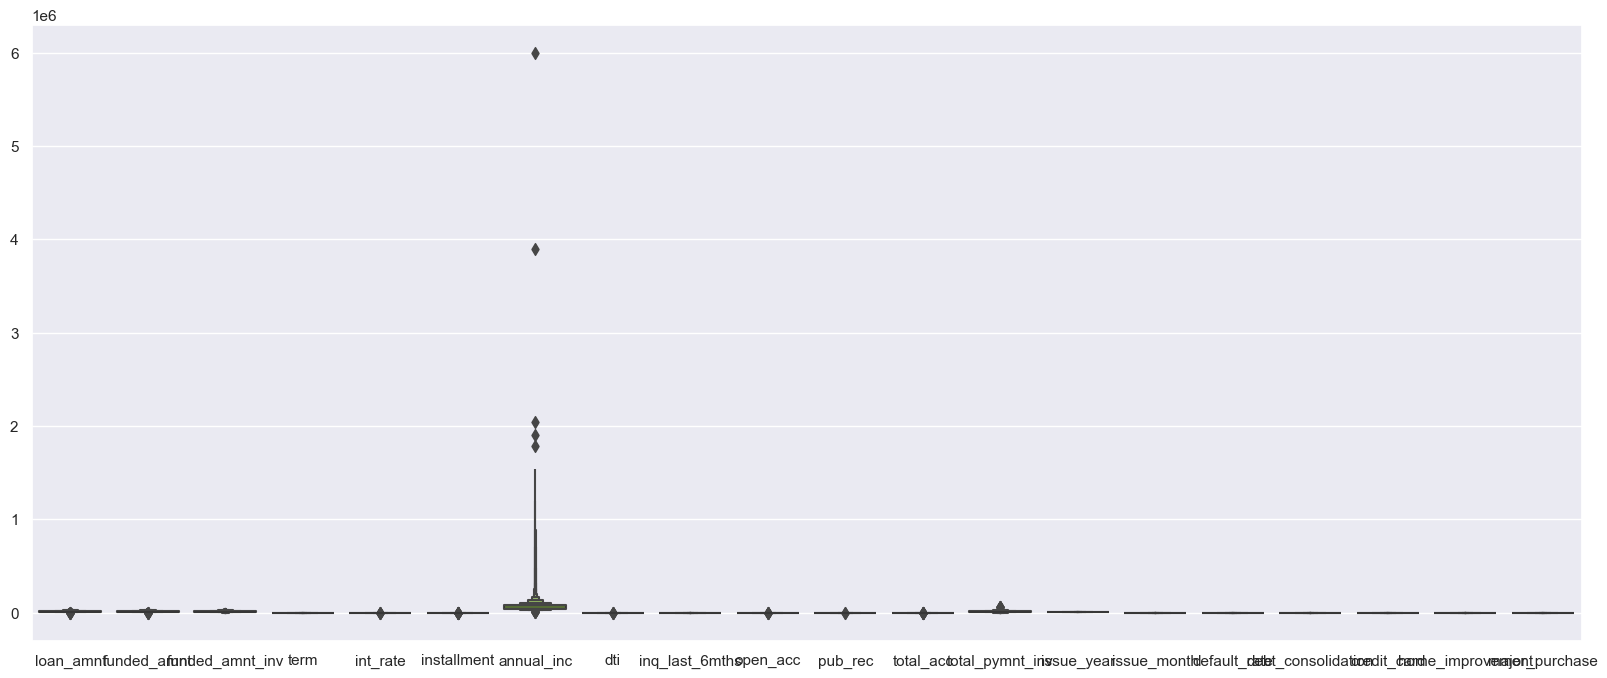

In [788]:
width = 20
height = 8
sns.set(rc = {'figure.figsize':(width,height)})
sns.boxenplot(df)

<Axes: >

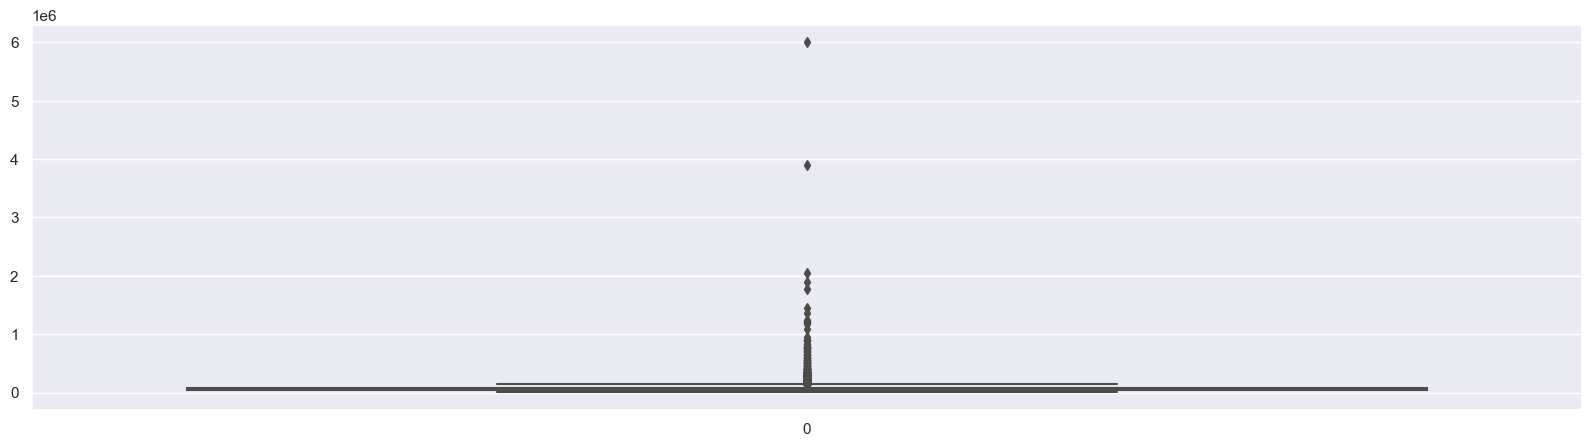

In [789]:
width = 20
height = 5
sns.set(rc = {'figure.figsize':(width,height)})
sns.boxplot(df['annual_inc'])

In [790]:
df['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

###### 
- Inference - annual_inc is having outliers as per above box plot

In [791]:
df_outliner_quantile = df.annual_inc.quantile([0.25, 0.40, 0.50, 0.75, 0.90, 0.95, 0.96, 0.97, 0.98, 0.99])
df_outliner_quantile

0.25     40000.0
0.40     50004.0
0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.96    150000.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [792]:
annual_inc_df_95_b = df[df['annual_inc'] < df['annual_inc'].quantile(0.99)]
df = df[df['annual_inc'] <= annual_inc_df_95_b['annual_inc'].max()]

In [793]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc,total_pymnt_inv,issue_year,issue_month,default_rate,debt_consolidation,credit_card,home_improvement,major_purchase
0,5000.0,5000.0,4975.0,36,10.65,162.87,B,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,1985-01-01,1,3,0,9,5833.84,2011,12,0,0,1,0,0
1,2500.0,2500.0,2500.0,60,15.27,59.83,C,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00,1999-04-01,5,3,0,4,1008.71,2011,12,1,0,0,0,0
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,8.72,2001-11-01,2,2,0,10,3005.67,2011,12,0,0,0,0,0
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00,1996-02-01,1,10,0,37,12231.89,2011,12,0,0,0,0,0
5,5000.0,5000.0,5000.0,36,7.90,156.46,A,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,11.20,2004-11-01,3,9,0,12,5632.21,2011,12,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500.0,2500.0,1075.0,36,8.07,78.42,A,MORTGAGE,110000.0,Not Verified,2007-07-01,Fully Paid,home_improvement,11.33,1990-11-01,0,13,0,40,1213.88,2007,7,0,0,0,1,0
39713,8500.0,8500.0,875.0,36,10.28,275.38,C,RENT,18000.0,Not Verified,2007-07-01,Fully Paid,credit_card,6.40,1986-12-01,1,6,0,9,1020.51,2007,7,0,0,1,0,0
39714,5000.0,5000.0,1325.0,36,8.07,156.84,A,MORTGAGE,100000.0,Not Verified,2007-07-01,Fully Paid,debt_consolidation,2.30,1998-10-01,0,11,0,20,1397.12,2007,7,0,1,0,0,0
39715,5000.0,5000.0,650.0,36,7.43,155.38,A,MORTGAGE,200000.0,Not Verified,2007-07-01,Fully Paid,other,3.72,1988-11-01,0,17,0,26,672.66,2007,7,0,0,0,0,0


In [794]:
df['annual_inc'].describe()

count     38191.000000
mean      65313.610090
std       35150.773045
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80232.000000
max      234000.000000
Name: annual_inc, dtype: float64

<Axes: >

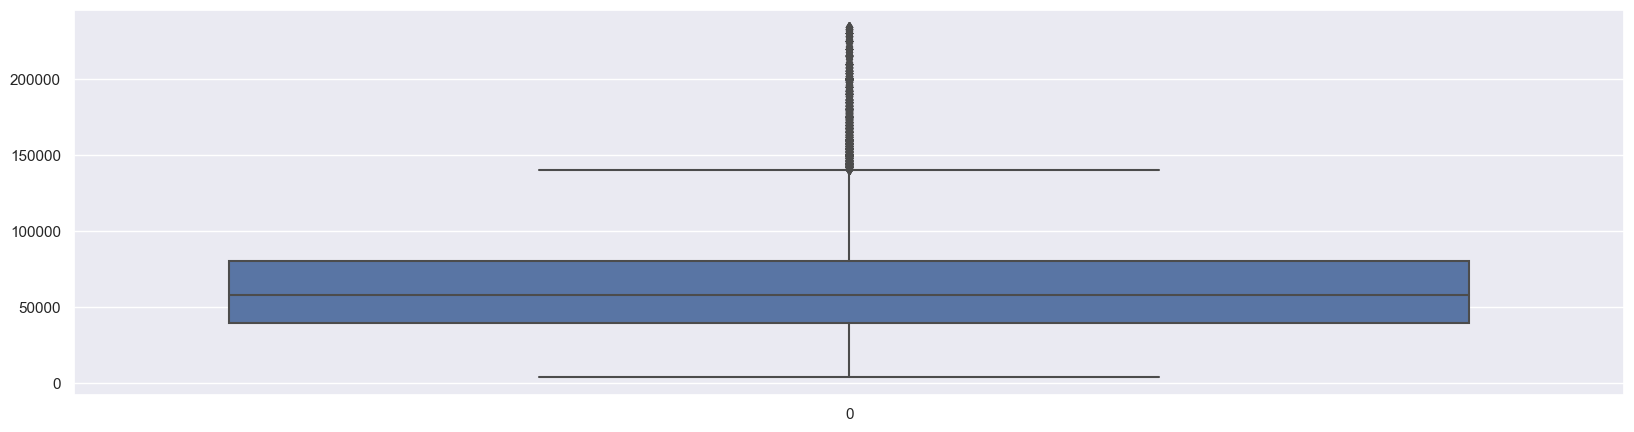

In [795]:
width = 20
height = 5
sns.set(rc = {'figure.figsize':(width,height)})
sns.boxplot(df['annual_inc'])


## Step 5 : Exploratory Data Analysis (EDA)


### Step 5.1 Univariate analysis
#### Step 5.1.1 Unordered Categorical Variables
##### Step 5.1.1.1 Univariate Analysis on loan_status variable

Total Count :  38191
Percentage:
 loan_status
Fully Paid     85.4
Charged Off    14.6
Name: proportion, dtype: float64 



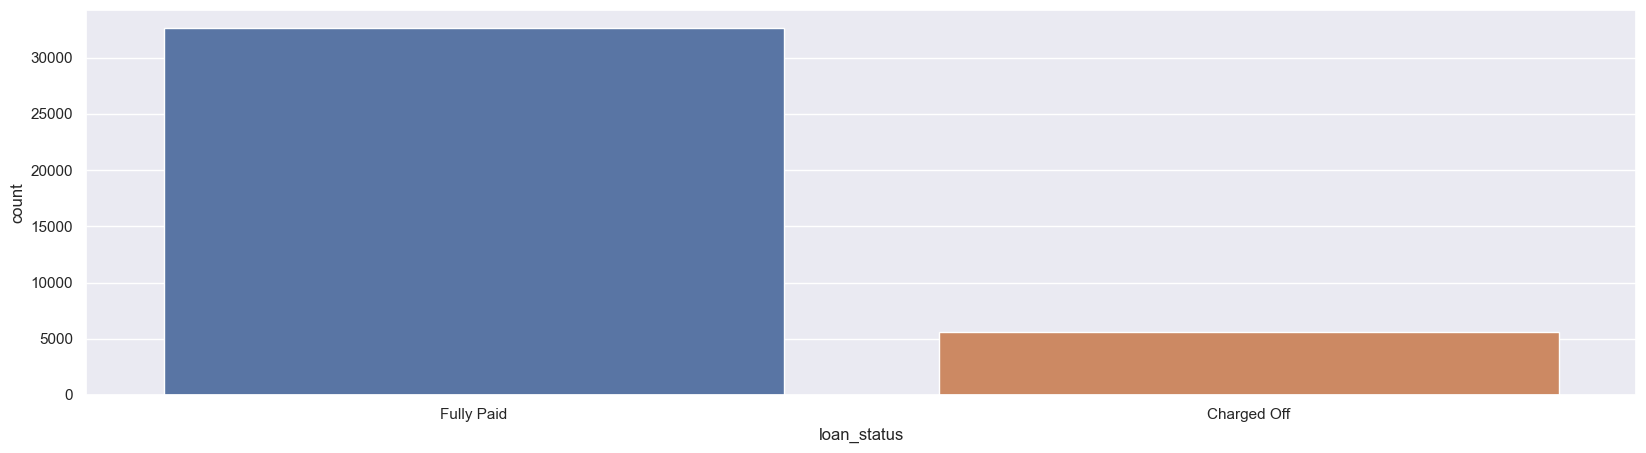

In [796]:
unordered_variable_loan_status = 'loan_status'
unordered_variable_loan_status_count = df[unordered_variable_loan_status].count()
unordered_variable_loan_status_percentage = round((df[unordered_variable_loan_status].value_counts(normalize=True)*100), 1)
sns.countplot(df, x=unordered_variable_loan_status)
print('Total Count : ',unordered_variable_loan_status_count)
print('Percentage:\n',unordered_variable_loan_status_percentage,'\n')


##### Step 5.1.1.2 Univariate Analysis on Loan Purpose variable

Total Count :  38191
Percentage:
 purpose
debt_consolidation    46.9
credit_card           13.1
other                 10.0
home_improvement       7.3
major_purchase         5.6
small_business         4.5
car                    3.9
wedding                2.4
medical                1.8
moving                 1.5
vacation               1.0
house                  0.9
educational            0.8
renewable_energy       0.3
Name: proportion, dtype: float64 



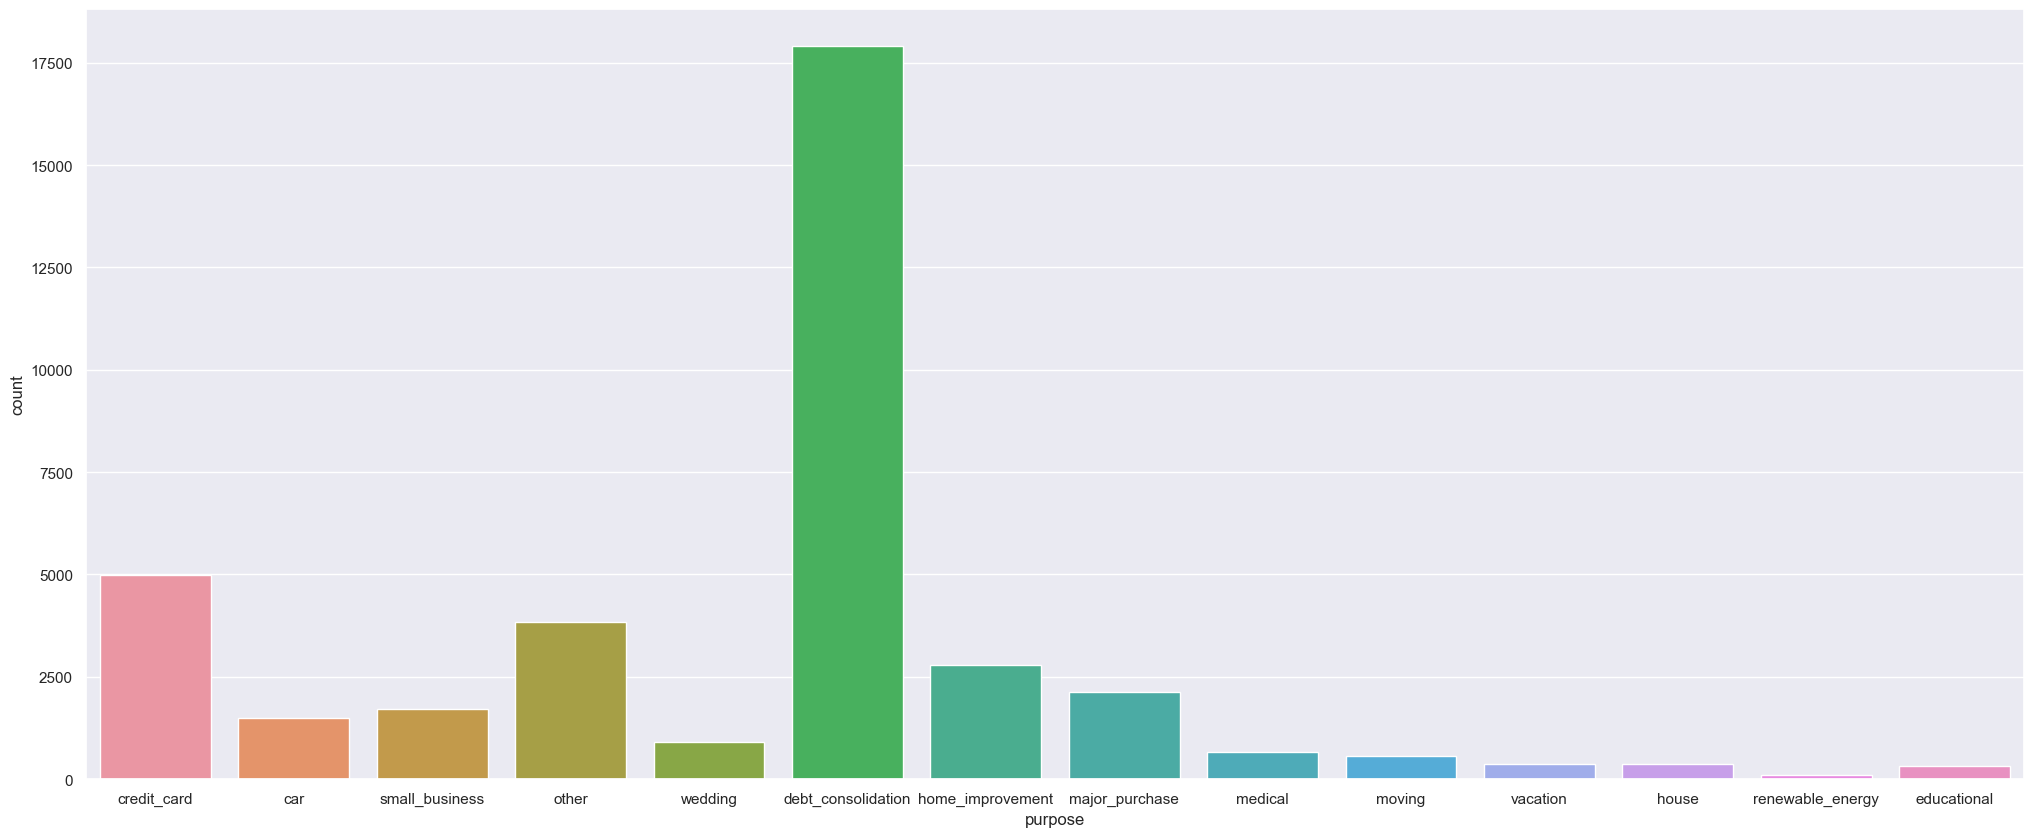

In [797]:
unordered_variable_purpose = 'purpose'
unordered_variable_purpose_count = df[unordered_variable_purpose].count()
unordered_variable_purpose_percentage = round ((df[unordered_variable_purpose].value_counts(normalize=True)*100),1)
width = 25
height = 10
sns.set(rc = {'figure.figsize':(width,height)})
sns.countplot(df, x=unordered_variable_purpose)
print('Total Count : ',unordered_variable_purpose_count)
print('Percentage:\n',unordered_variable_purpose_percentage,'\n')

#####  Step 5.1.1.3 Analyzing home_ownership

In [798]:
#checking unique values for home_ownership
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

- There are very minimal records with 'NONE' value in the data. So replacing the value with 'OTHER'

In [799]:
#replacing 'NONE' with 'OTHERS'
df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [800]:
#checking unique values for home_ownership again
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<Axes: xlabel='home_ownership', ylabel='count'>

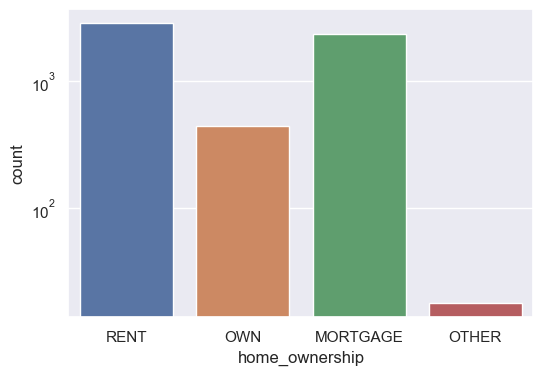

In [801]:
#graph plot on log scale
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=df[df['loan_status']=='Charged Off'])


##### Step 5.1.1.4 Univariate Analysis on Verification_status variable

<Axes: xlabel='verification_status', ylabel='count'>

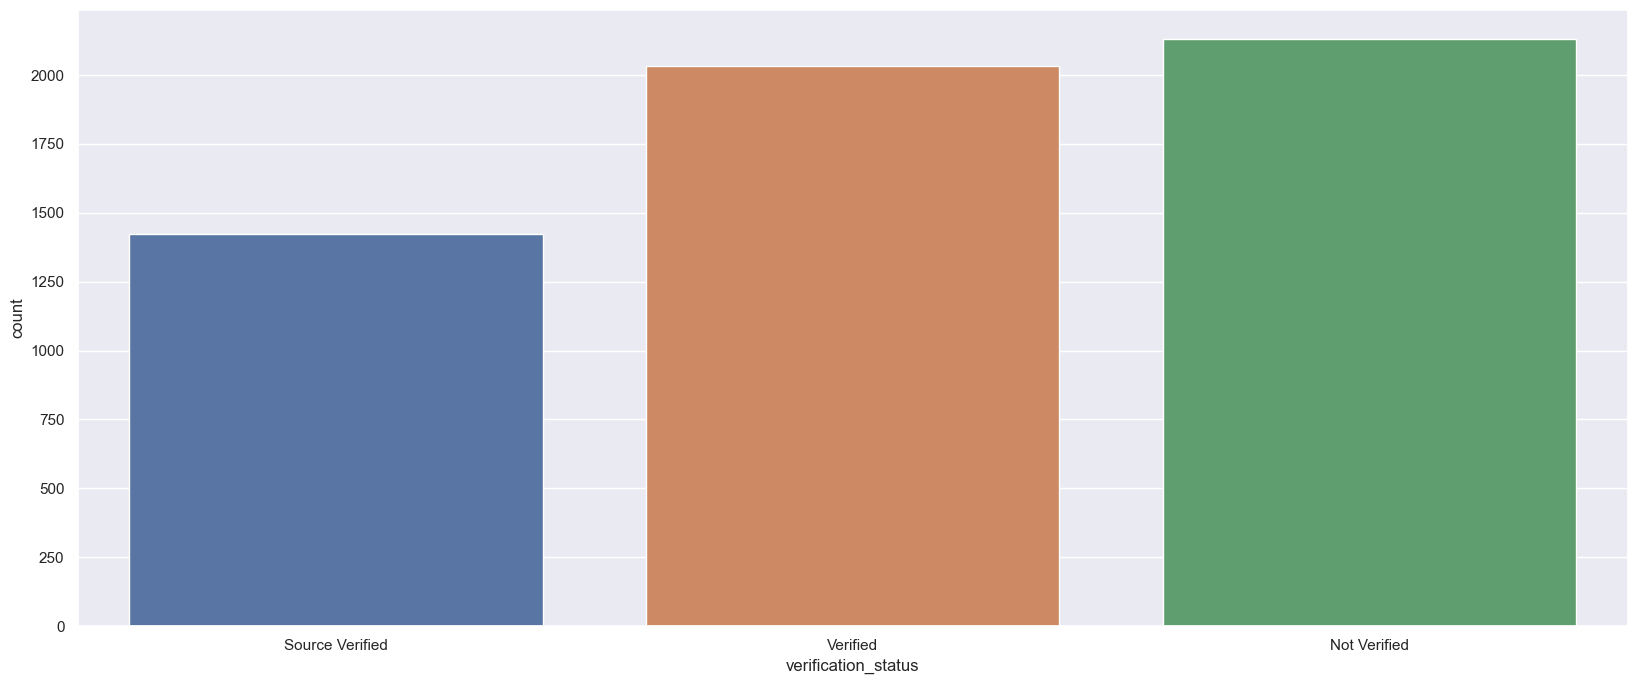

In [802]:
width = 20
height = 8
sns.set(rc = {'figure.figsize':(width,height)})
sns.countplot(x='verification_status', data=df[df['loan_status']=='Charged Off'])

#### Step 5.1.2 Univariate Analysis - Ordered Categorical Variables
##### Step 5.1.2.1 First Ordered Variable - term 

Total Count :  38191
Percentage:
 term
36    75.5
60    24.5
Name: proportion, dtype: float64 



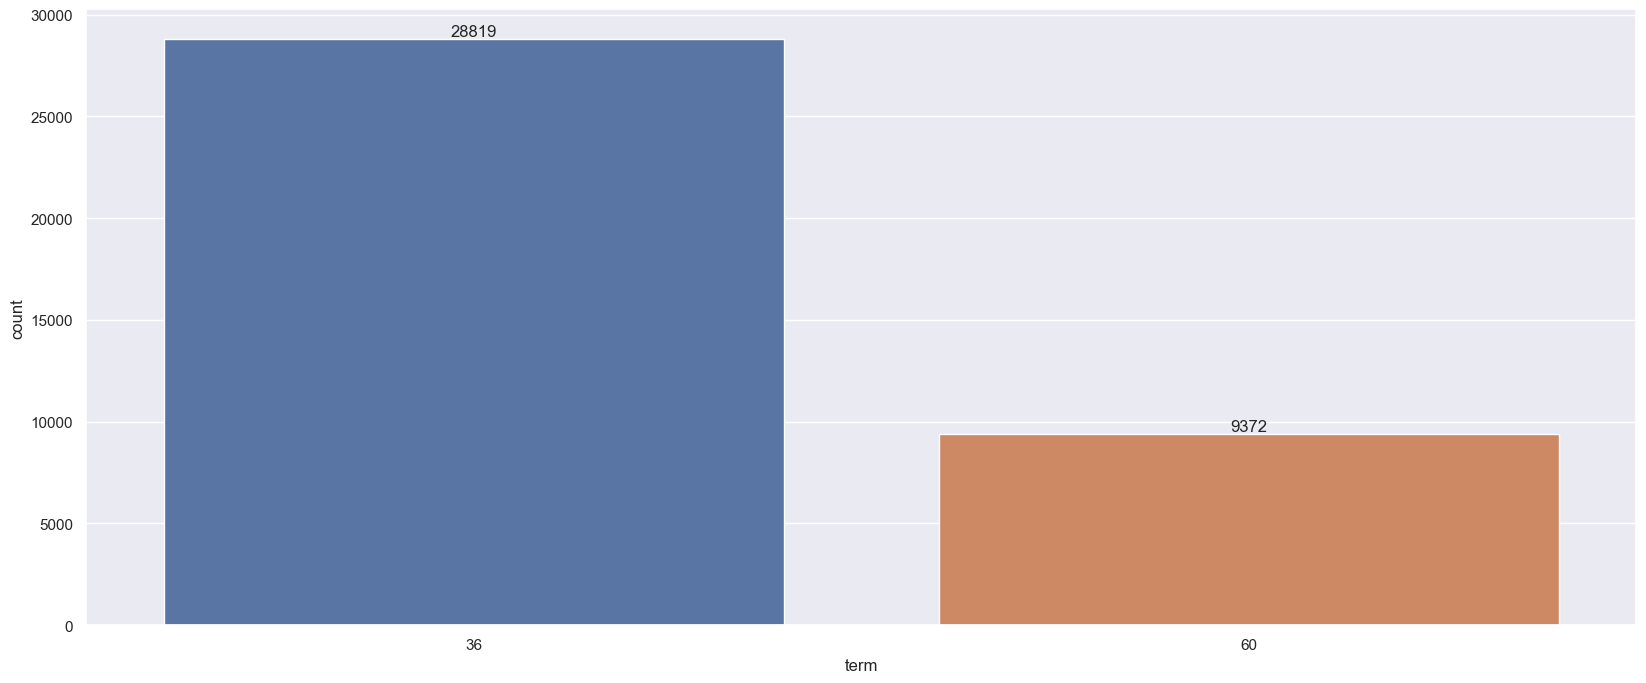

In [803]:
ordered_variable_term = 'term'
ordered_variable_term_count = df[ordered_variable_term].count()
ordered_variable_term_percentage = round((df[ordered_variable_term].value_counts(normalize=True)*100),1)
ax1 = sns.countplot(x=ordered_variable_term, data=df)
for container in ax1.containers:
    ax1.bar_label(container)
print('Total Count : ',ordered_variable_term_count)
print('Percentage:\n',ordered_variable_term_percentage,'\n')

##### Step 5.1.2.2 Second Ordered Variable - grade 

Count :  38191
Percentage:
 grade
B    30.3
A    26.1
C    20.3
D    13.2
E     6.8
F     2.5
G     0.8
Name: proportion, dtype: float64 



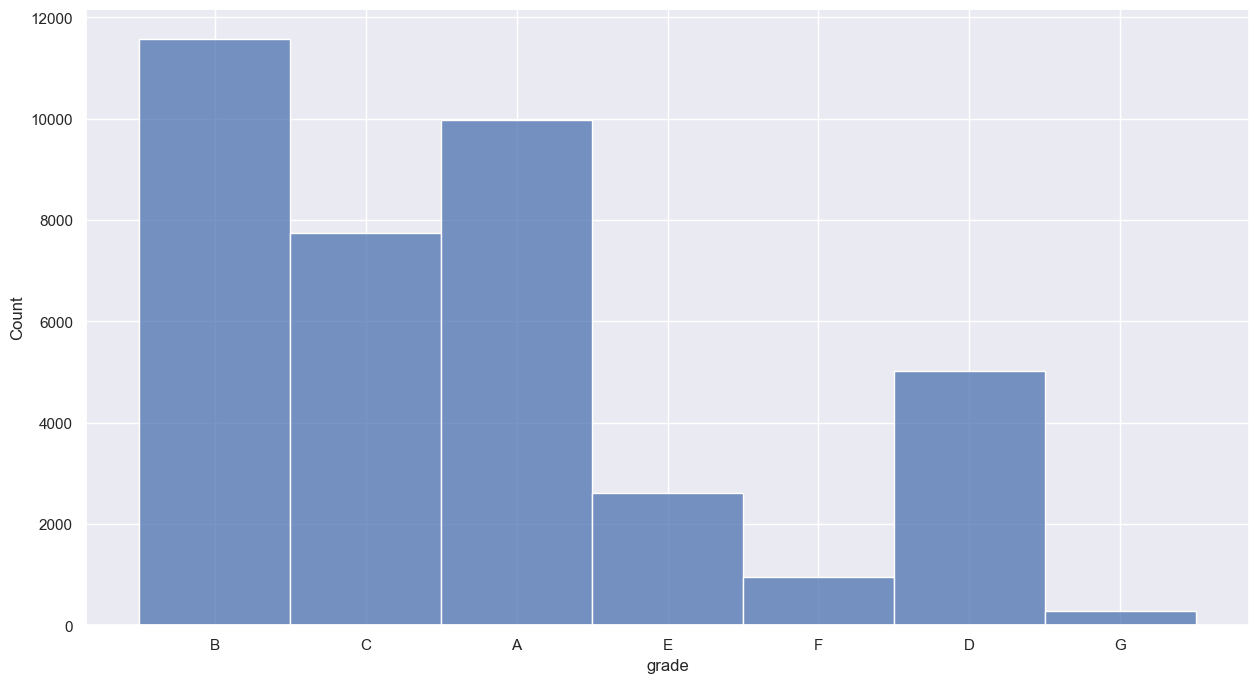

In [804]:
ordered_variable_grade = 'grade'
ordered_variable_grade_count = df[ordered_variable_grade].count()
ordered_variable_grade_percentage = round((df[ordered_variable_grade].value_counts(normalize=True)*100),1)
width = 15
height = 8
sns.set(rc = {'figure.figsize':(width,height)})
sns.histplot(df, x=ordered_variable_grade)
print('Count : ',ordered_variable_grade_count)
print('Percentage:\n',ordered_variable_grade_percentage,'\n')

#### Step 5.1.3  Univariate Analysis - Quantitative Variables
##### On variable as int_rate

Mean of Interest rate :  11.9
Median of Interest rate :  11.7
Maximum Interest rate is :  24.4
Mimimum Interest rate is :  5.4
Interest rate range :  19.0
Variance :  13.6
Standard Deviation :  3.7


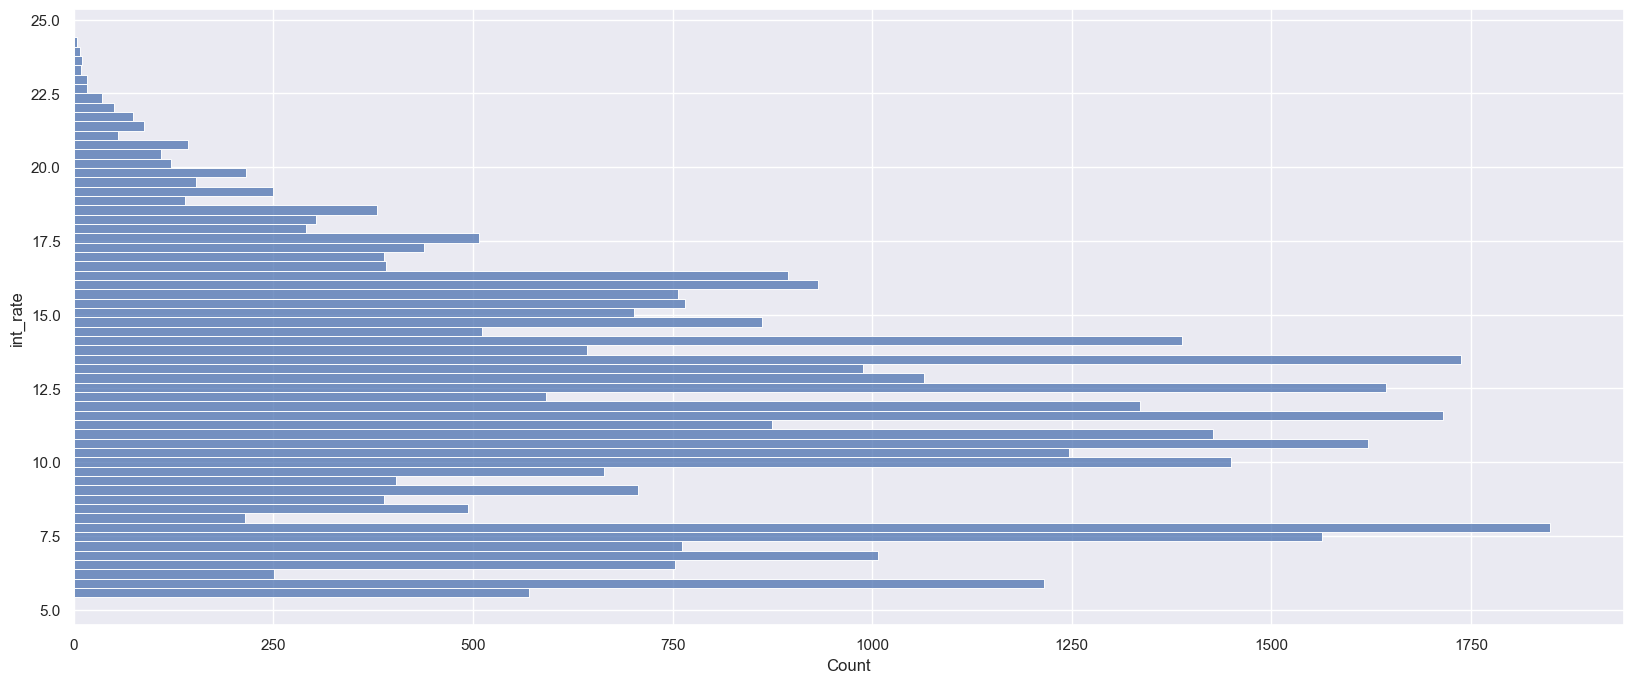

In [805]:
quantitative_variable_int_rate = 'int_rate'
ordered_variable_int_rate_mean = round(df[quantitative_variable_int_rate].mean(),1)
ordered_variable_int_rate_median = round(df[quantitative_variable_int_rate].median(),1)
ordered_variable_int_rate_max = round(df[quantitative_variable_int_rate].max(),1)
ordered_variable_int_rate_min = round(df[quantitative_variable_int_rate].min(),1)
ordered_variable_int_rate_range = round(ordered_variable_int_rate_max - ordered_variable_int_rate_min,1)
ordered_variable_int_rate_variance = round(df[quantitative_variable_int_rate].var(),1)
ordered_variable_int_rate_standard_devi = round(df[quantitative_variable_int_rate].std(),1)

width = 20
height = 8
sns.set(rc = {'figure.figsize':(width,height)})
sns.histplot(df,y=quantitative_variable_int_rate)


print('Mean of Interest rate : ',ordered_variable_int_rate_mean)
print('Median of Interest rate : ',ordered_variable_int_rate_median)
print('Maximum Interest rate is : ',ordered_variable_int_rate_max)
print('Mimimum Interest rate is : ',ordered_variable_int_rate_min)
print('Interest rate range : ',ordered_variable_int_rate_range)
print('Variance : ',ordered_variable_int_rate_variance)
print('Standard Deviation : ',ordered_variable_int_rate_standard_devi)

### Step 5.2 Segmented Univariate Analysis 
#### Step 5.2.1 On variable = 'issue_year'

- we segmented issue_d previously and added it as part of df and named them issue_year & issue_month
- segment analysis is mostly business driven or domain driven decision where category is basis of segmentation

Count :  38191
Percentage:
 issue_year
2011    53.2
2010    29.9
2009    12.2
2008     4.1
2007     0.6
Name: proportion, dtype: float64 



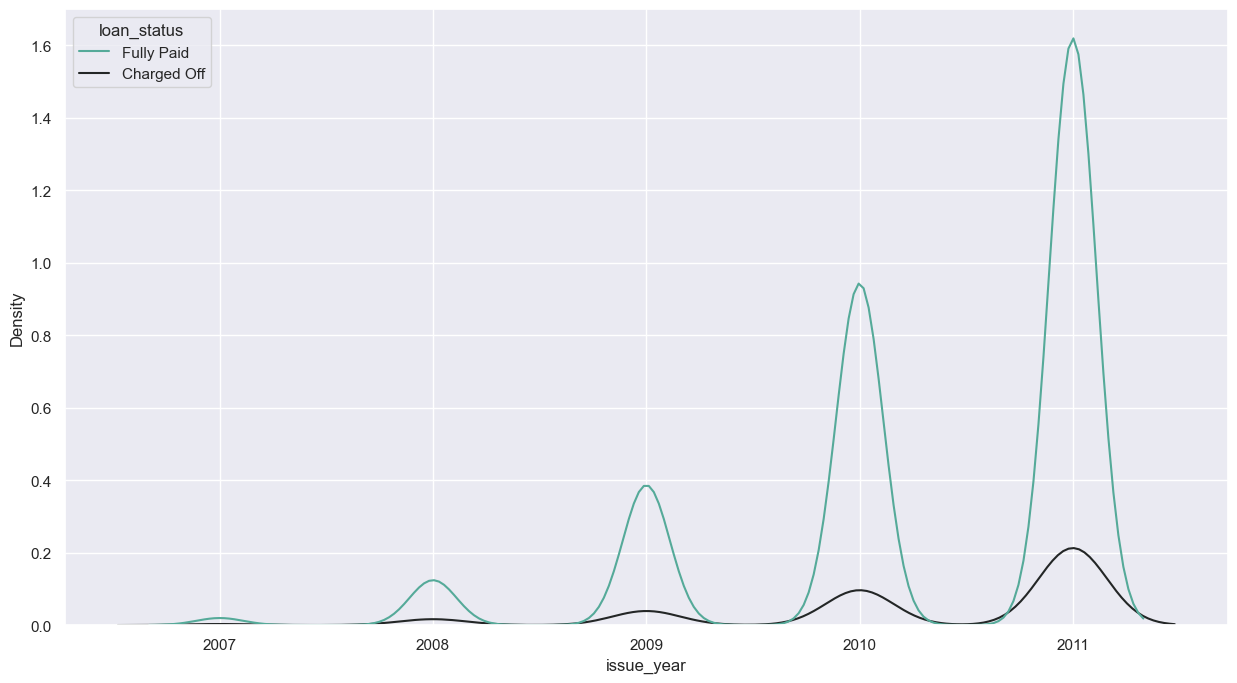

In [806]:
unordered_variable_issue_year = 'issue_year'
unordered_variable_issue_year_count = df[unordered_variable_issue_year].count()
unordered_variable_issue_year_percentage = df[unordered_variable_issue_year].value_counts(normalize=True)*100
width = 15
height = 8
sns.set(rc = {'figure.figsize':(width,height)})
sns.kdeplot(df, x=unordered_variable_issue_year, hue='loan_status', palette='dark:#5A9_r')
print('Count : ',unordered_variable_issue_year_count)
print('Percentage:\n',round(unordered_variable_issue_year_percentage,1),'\n')

#### Step 5.2.2 Univariate Analysis on Issue_Year

Total Count :  38191
Percentage:
 issue_year
2011    53.2
2010    29.9
2009    12.2
2008     4.1
2007     0.6
Name: proportion, dtype: float64 



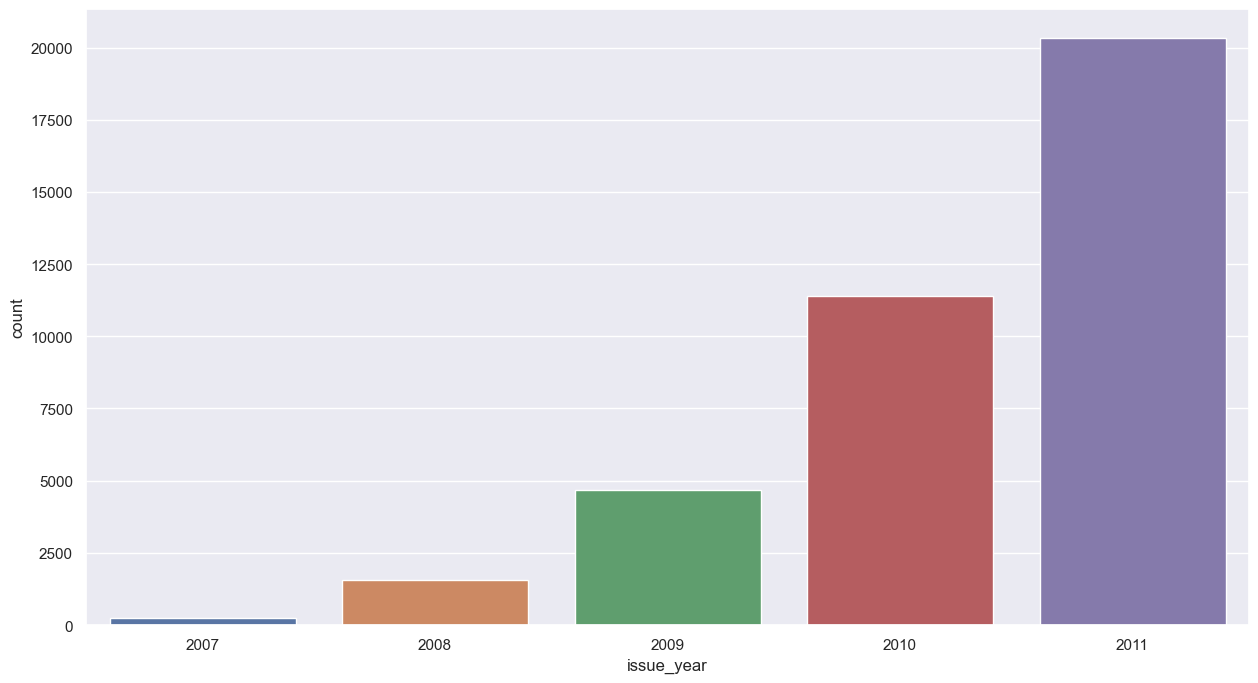

In [807]:
unordered_variable_issue_yr = 'issue_year'
unordered_variable_issue_yr_count = df[unordered_variable_issue_yr].count()
unordered_variable_issue_yr_percentage = round((df[unordered_variable_issue_yr].value_counts(normalize=True)*100), 1)
sns.countplot(df, x=unordered_variable_issue_yr)
print('Total Count : ',unordered_variable_issue_yr_count)
print('Percentage:\n',unordered_variable_issue_yr_percentage,'\n')

#### Step 5.2.3 Univariate Analysis on Issue_month for Charged Off loans

<Axes: xlabel='issue_month', ylabel='count'>

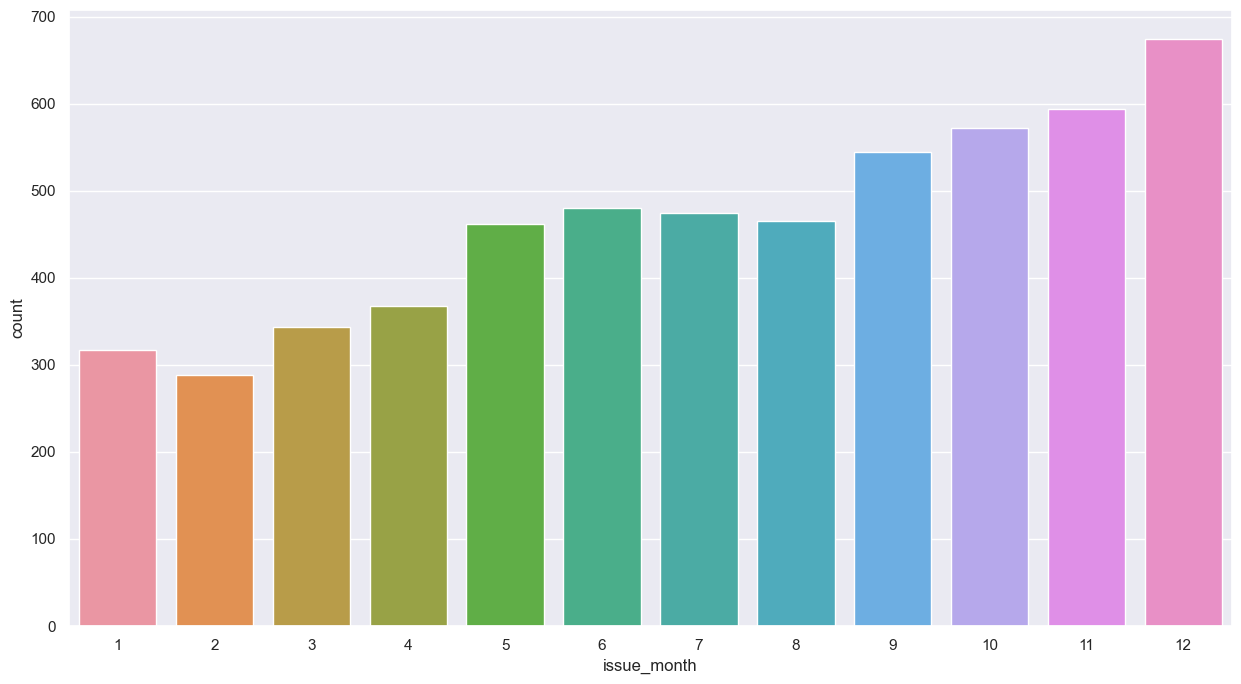

In [808]:
sns.countplot(x='issue_month', data=df[df['loan_status']=='Charged Off'])

### Step 5.3 Bivariate Analysis
#### Step 5.3.1 Loan Default_rate by loan purpose

,purpose,default_rate
0,car,0.11
1,credit_card,0.11
2,debt_consolidation,0.15
3,educational,0.17
4,home_improvement,0.12
5,house,0.16
6,major_purchase,0.10
7,medical,0.16
8,moving,0.16
9,other,0.16


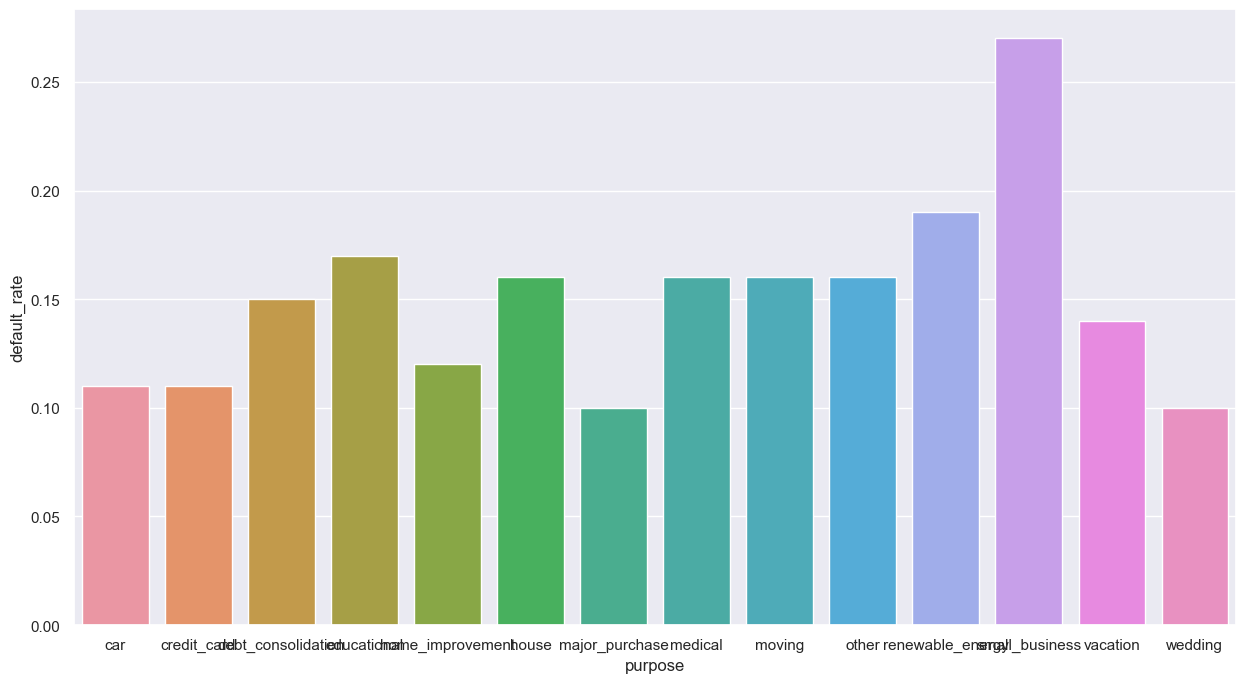

In [809]:
ba = round(df.groupby([ 'purpose'])['default_rate'].mean().reset_index(),2)
sns.barplot(ba, x='purpose', y='default_rate')
ba

#### Step 5.3.2 Purpose vs Loan Status

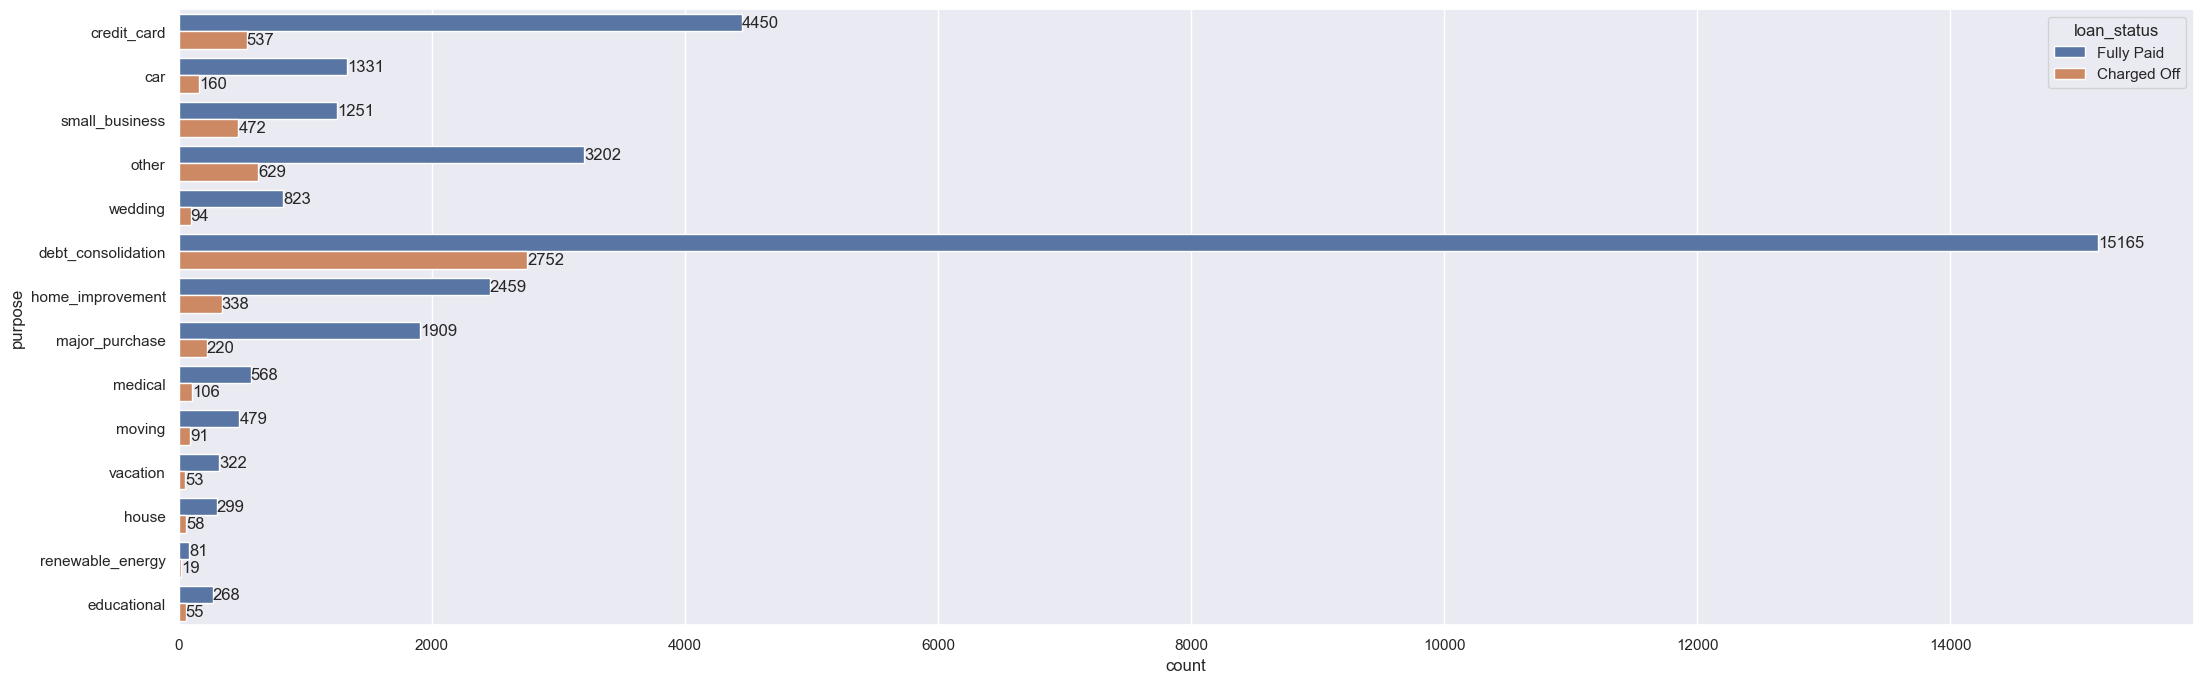

In [810]:
width = 26
height = 8
sns.set(rc = {'figure.figsize':(width,height)})
ax=sns.countplot(df, y='purpose', hue='loan_status')
for container in ax.containers:
    ax.bar_label(container)


#### Step 5.3.3 Loan Status vs term 

<Axes: xlabel='loan_status', ylabel='term'>

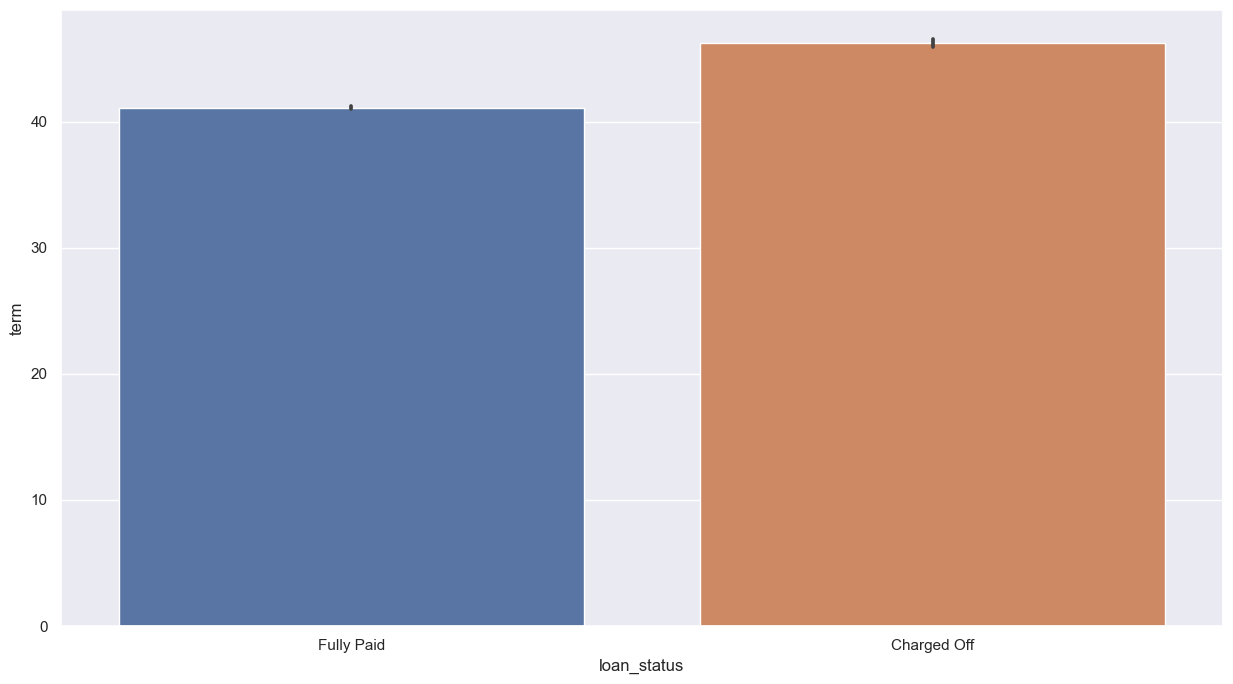

In [811]:
width = 15
height = 8
sns.set(rc = {'figure.figsize':(width,height)})
sns.barplot(df, x='loan_status', y='term')

#### Step 5.3.4  Loan Amount vs Installment

<Axes: xlabel='loan_amnt', ylabel='installment'>

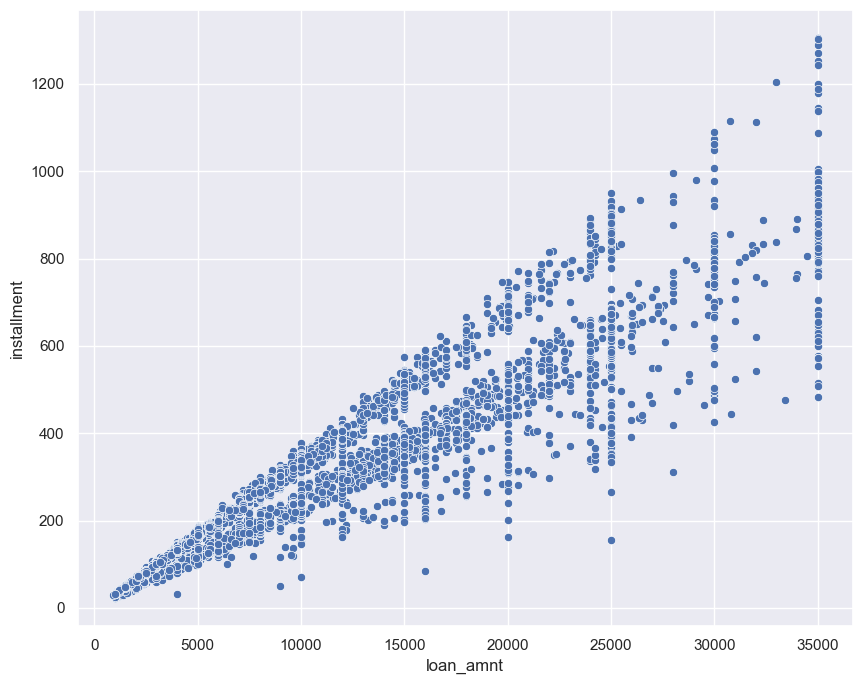

In [812]:
width = 10
height = 8
sns.set(rc = {'figure.figsize':(width,height)})
sns.scatterplot(x="loan_amnt",y="installment", data=df[df['loan_status']=='Charged Off'])

#### Step 5.3.5 Annual Income vs Installment

<Axes: xlabel='installment', ylabel='annual_inc'>

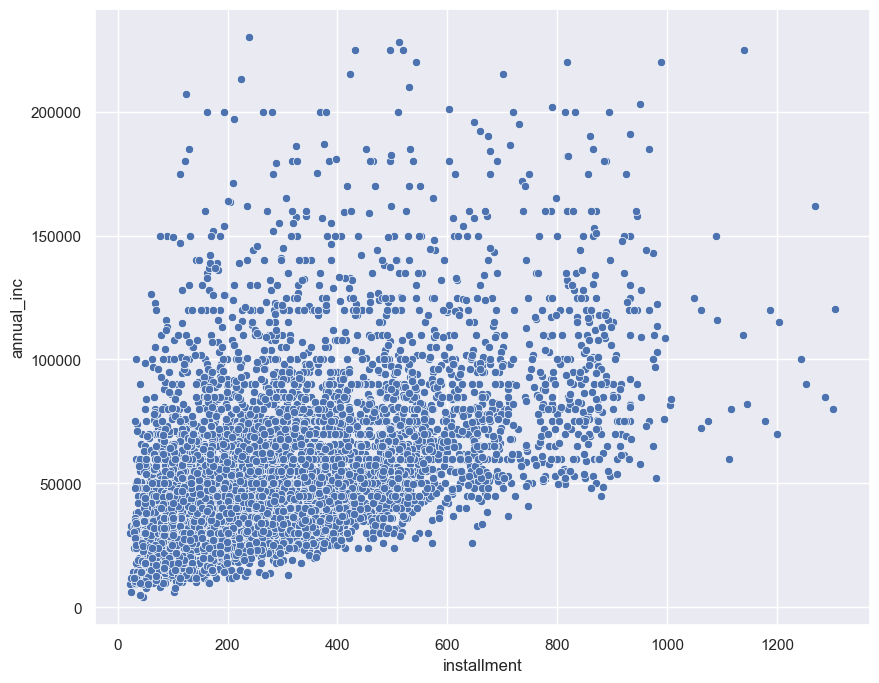

In [813]:
width = 10
height = 8
sns.set(rc = {'figure.figsize':(width,height)})
sns.scatterplot(x="installment",y="annual_inc",  data=df[df['loan_status']=='Charged Off'])

#### Step 5.3.6 Average of loan_amnt by term and loan_status 

,term,loan_status,loan_amnt
0,36,Charged Off,9319.90
1,36,Fully Paid,9542.34
2,60,Charged Off,15700.41
3,60,Fully Paid,15303.63


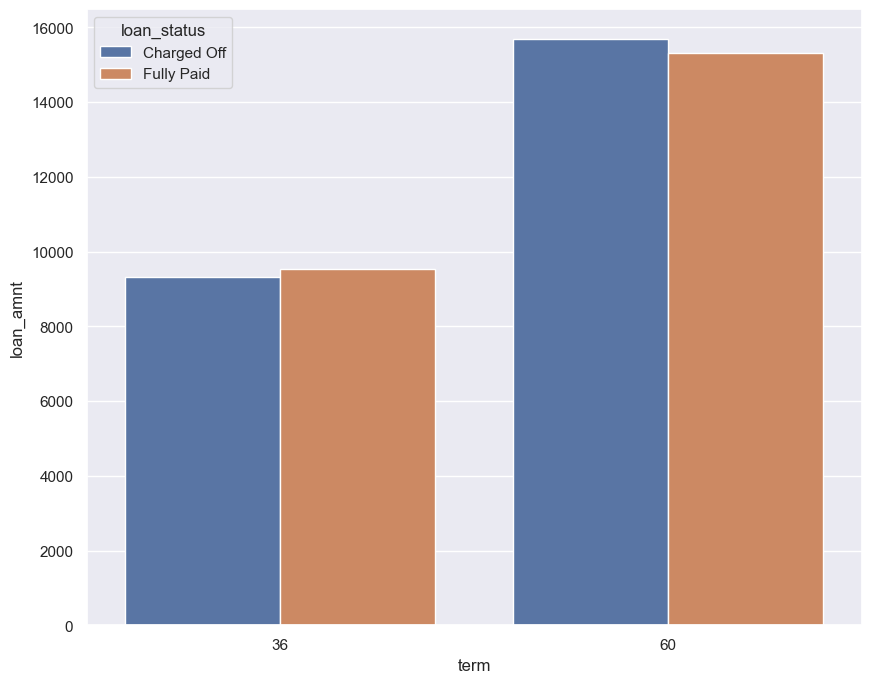

In [814]:
ba = round(df.groupby(['term', 'loan_status'])['loan_amnt'].mean().reset_index(),2)
sns.barplot(ba, x='term', y='loan_amnt', hue='loan_status')
ba

#### Step 5.3.7 Average of annual_inc by term and loan_status 

,term,loan_status,annual_inc
0,36,Charged Off,56582.41
1,36,Fully Paid,64753.88
2,60,Charged Off,64217.85
3,60,Fully Paid,71737.85


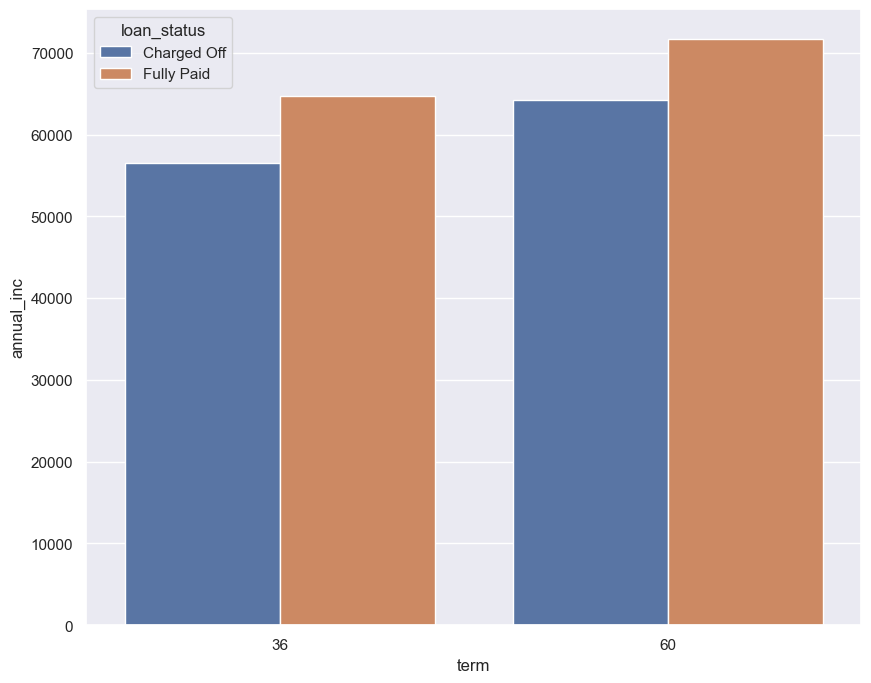

In [815]:
ba = round(df.groupby(['term', 'loan_status'])['annual_inc'].mean().reset_index(),2)
sns.barplot(ba, x='term', y='annual_inc', hue='loan_status')
ba

### Step 5.4 Multivariate Analysis

###### Creating bins for some numerical variable to make them categorical

In [816]:
# Binning to define Different Interest Rate, Income Groups, Installment groups and Loan Amount Groups
df['int_rate_groups'] = pd.cut(df['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
df['annual_inc_groups'] = pd.cut(df['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
df['installment_groups'] = pd.cut(df['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
df['loan_amnt_groups'] = pd.cut(df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])


#### Step 5.4.1 Loan Status by Loan Amount and Income Groups

<Axes: xlabel='annual_inc_groups', ylabel='loan_amnt'>

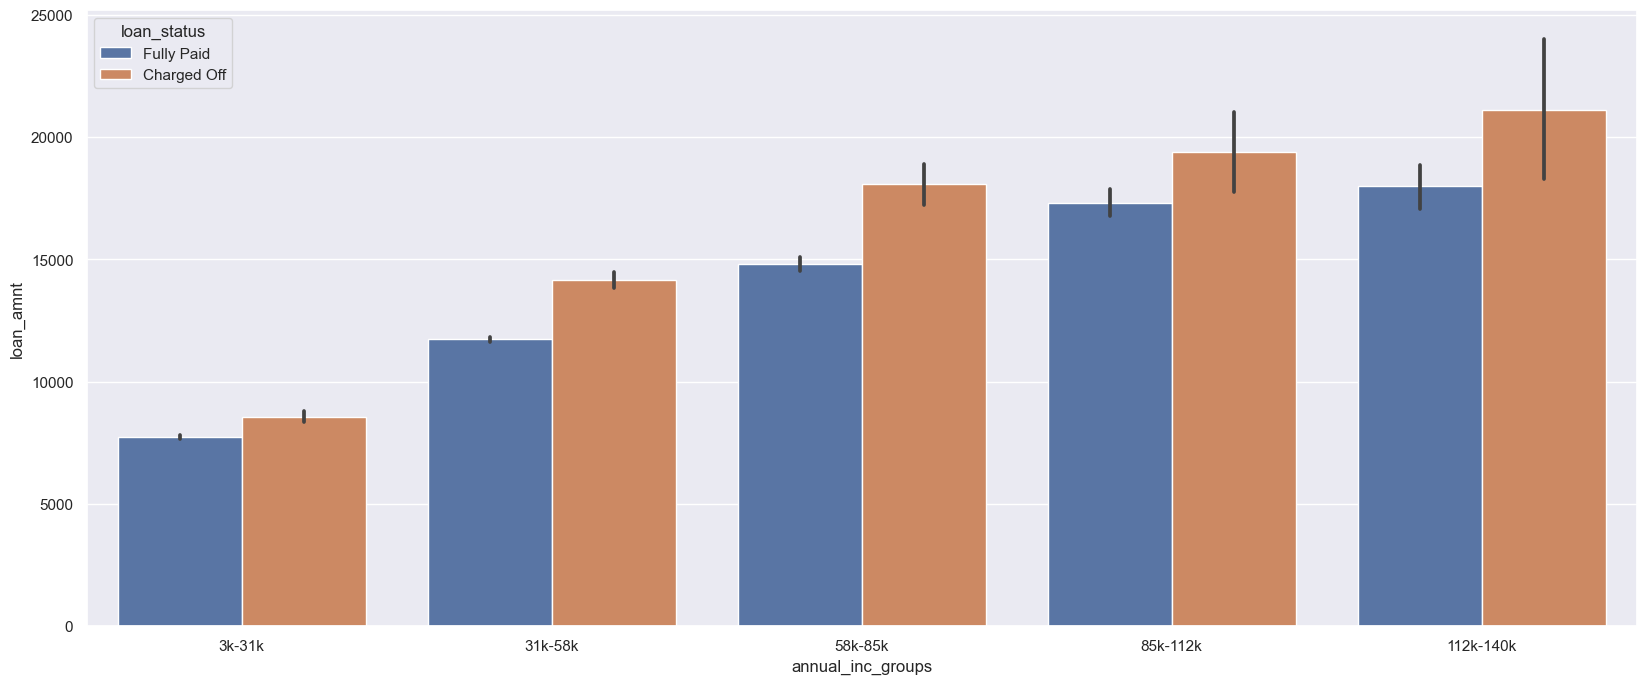

In [817]:
width = 20
height = 8
sns.set(rc = {'figure.figsize':(width,height)})
sns.barplot(df ,x='annual_inc_groups', y='loan_amnt', hue='loan_status')

#### Step 5.4.2 Average Interest rate for Top 4 purposes
###### Top Purchase - Debt Consolidation

,int_rate_groups,debt_consolidation
0,5%-9%,0.39
1,9%-13%,0.47
2,13%-17%,0.51
3,17%-21%,0.57
4,21%-24%,0.59


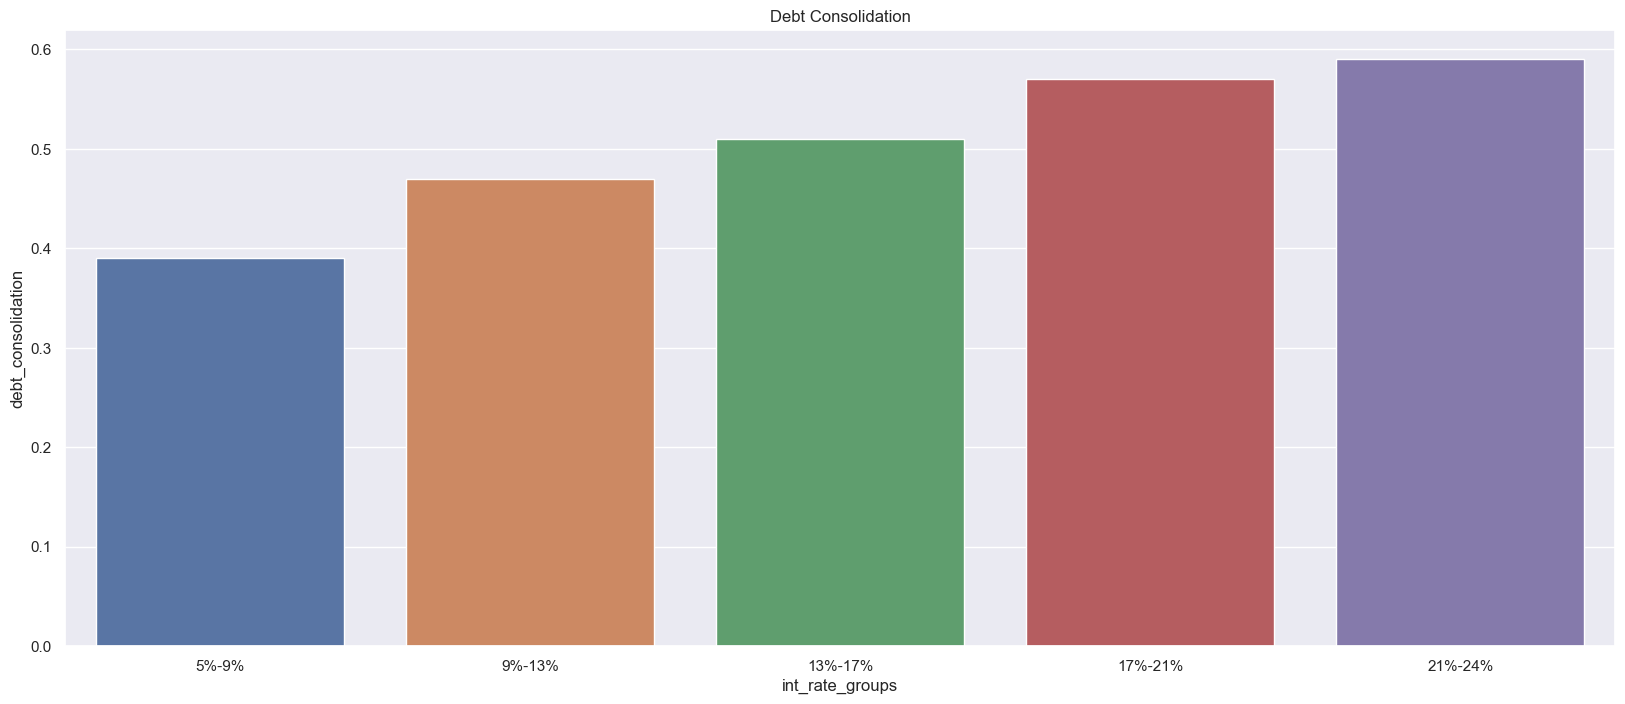

In [818]:
pp1 = round(df.groupby([ 'int_rate_groups'])['debt_consolidation'].mean().reset_index(),2)
sns.barplot(pp1, x='int_rate_groups', y='debt_consolidation').set_title ('Debt Consolidation') 
pp1


###### Top 2nd purchase - Credit Card

,int_rate_groups,credit_card
0,5%-9%,0.14
1,9%-13%,0.14
2,13%-17%,0.12
3,17%-21%,0.10
4,21%-24%,0.09


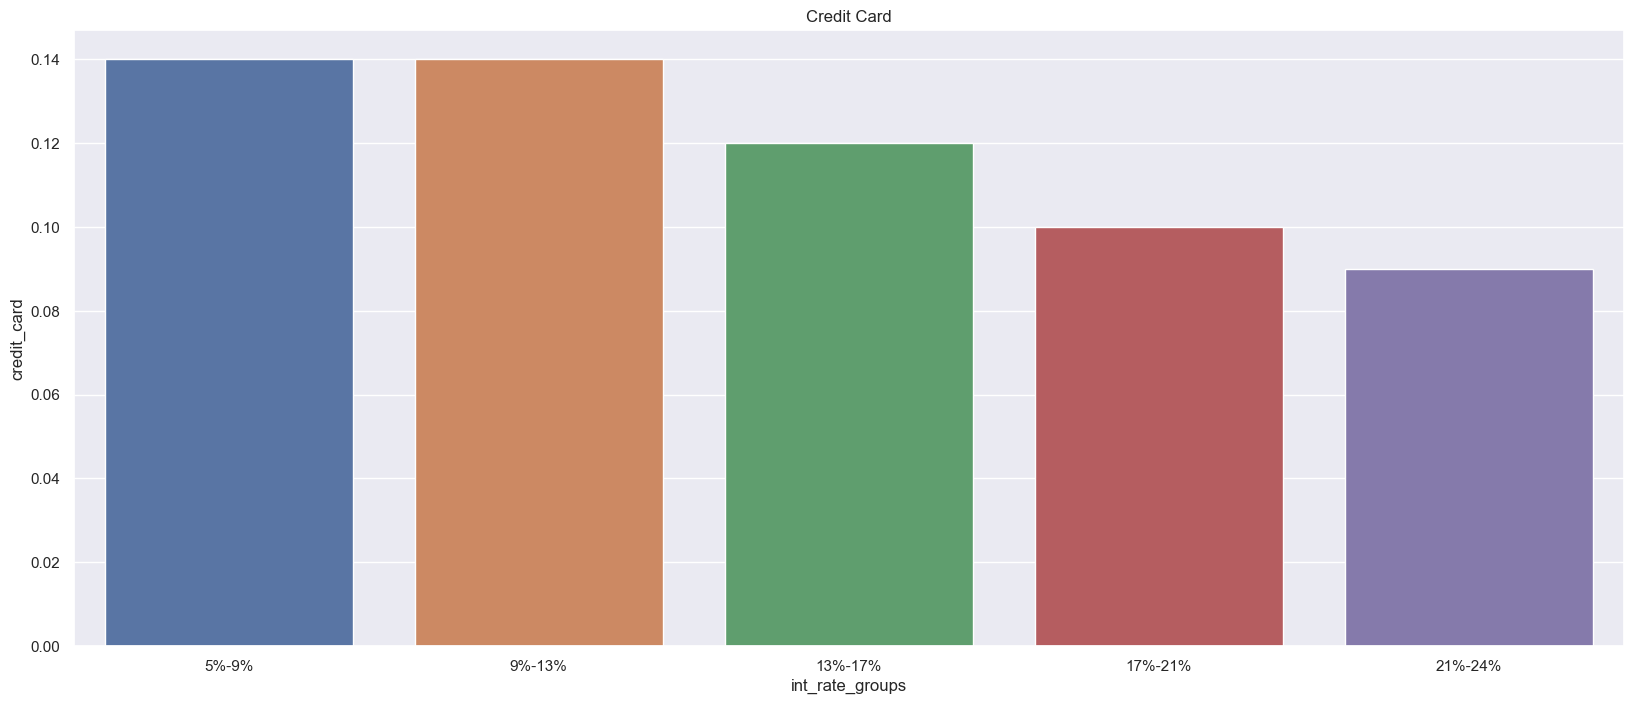

In [819]:
pp2 = round(df.groupby([ 'int_rate_groups'])['credit_card'].mean().reset_index(),2)
sns.barplot(pp2, x='int_rate_groups', y='credit_card').set_title ('Credit Card')
pp2

###### Top 3rd purchase - Home Improvement

,int_rate_groups,home_improvement
0,5%-9%,0.09
1,9%-13%,0.07
2,13%-17%,0.06
3,17%-21%,0.06
4,21%-24%,0.06


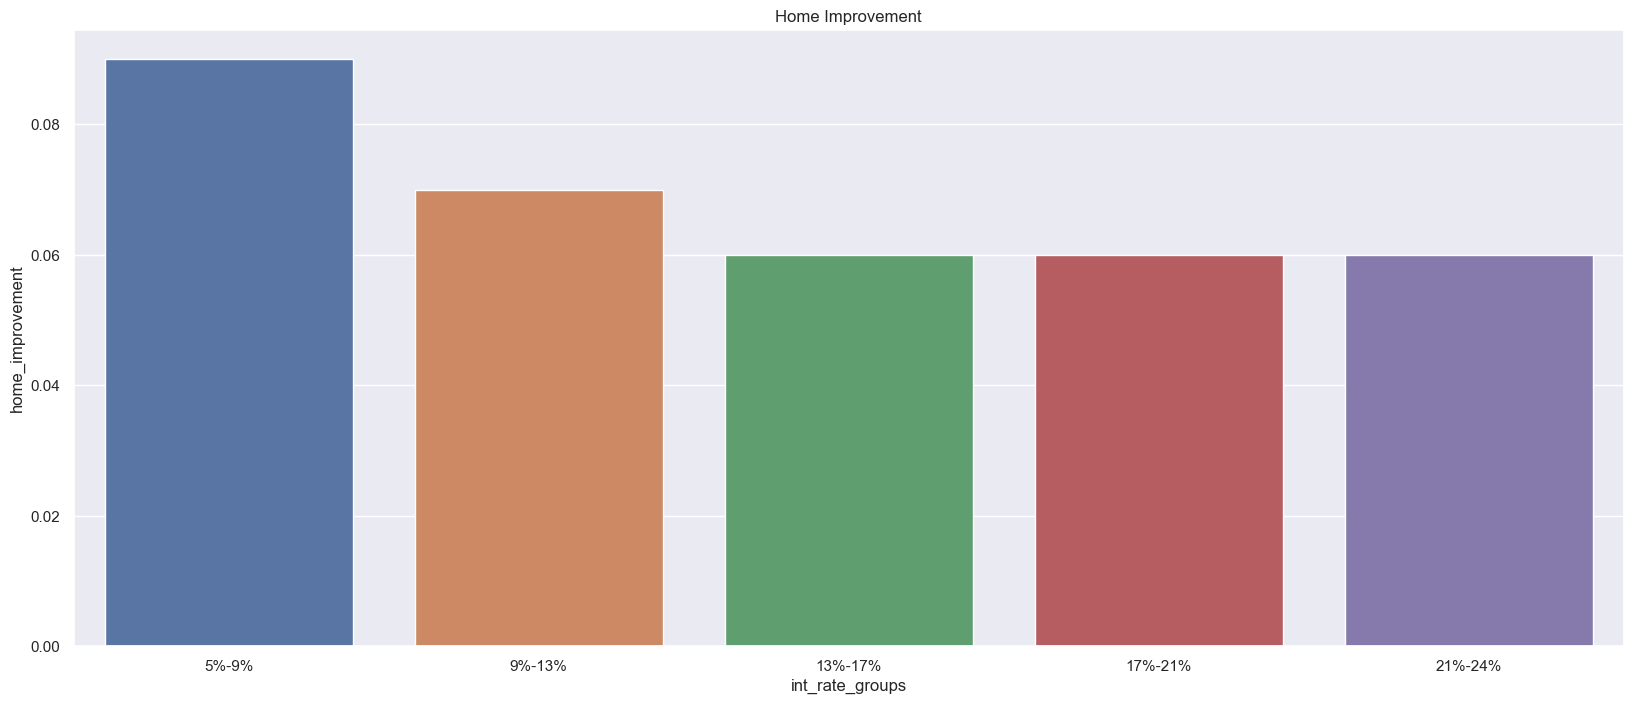

In [820]:
pp3 = round(df.groupby([ 'int_rate_groups'])['home_improvement'].mean().reset_index(),2)
sns.barplot(pp3, x='int_rate_groups', y='home_improvement').set_title ('Home Improvement')
pp3

###### Top 4th purchase - Major Purchase

,int_rate_groups,major_purchase
0,5%-9%,0.08
1,9%-13%,0.05
2,13%-17%,0.05
3,17%-21%,0.03
4,21%-24%,0.01


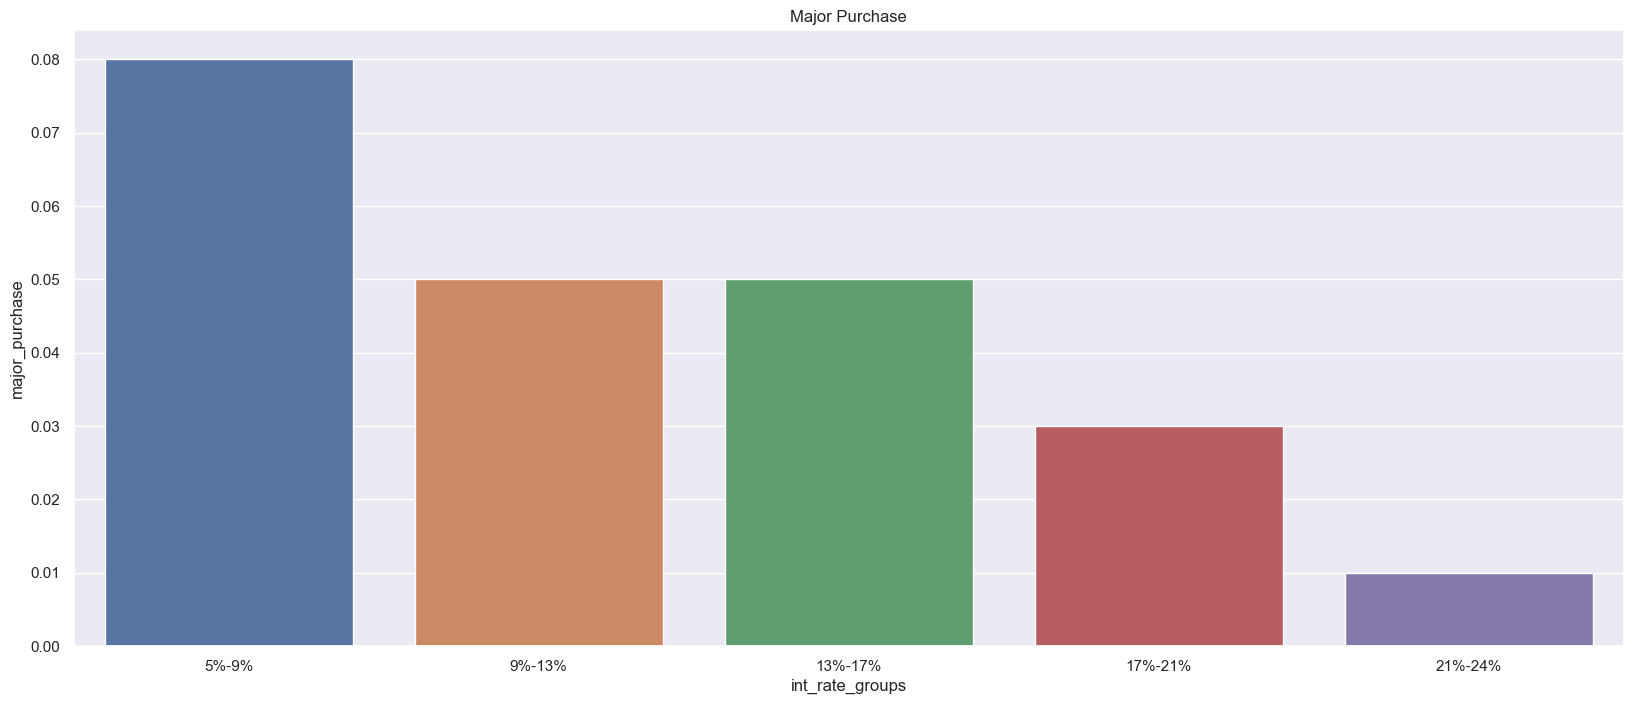

In [821]:
pp4 = round(df.groupby([ 'int_rate_groups'])['major_purchase'].mean().reset_index(),2)
sns.barplot(pp4, x='int_rate_groups', y='major_purchase').set_title ('Major Purchase')
pp4

#### Step 5.4.3 Correlation matrix

<Axes: >

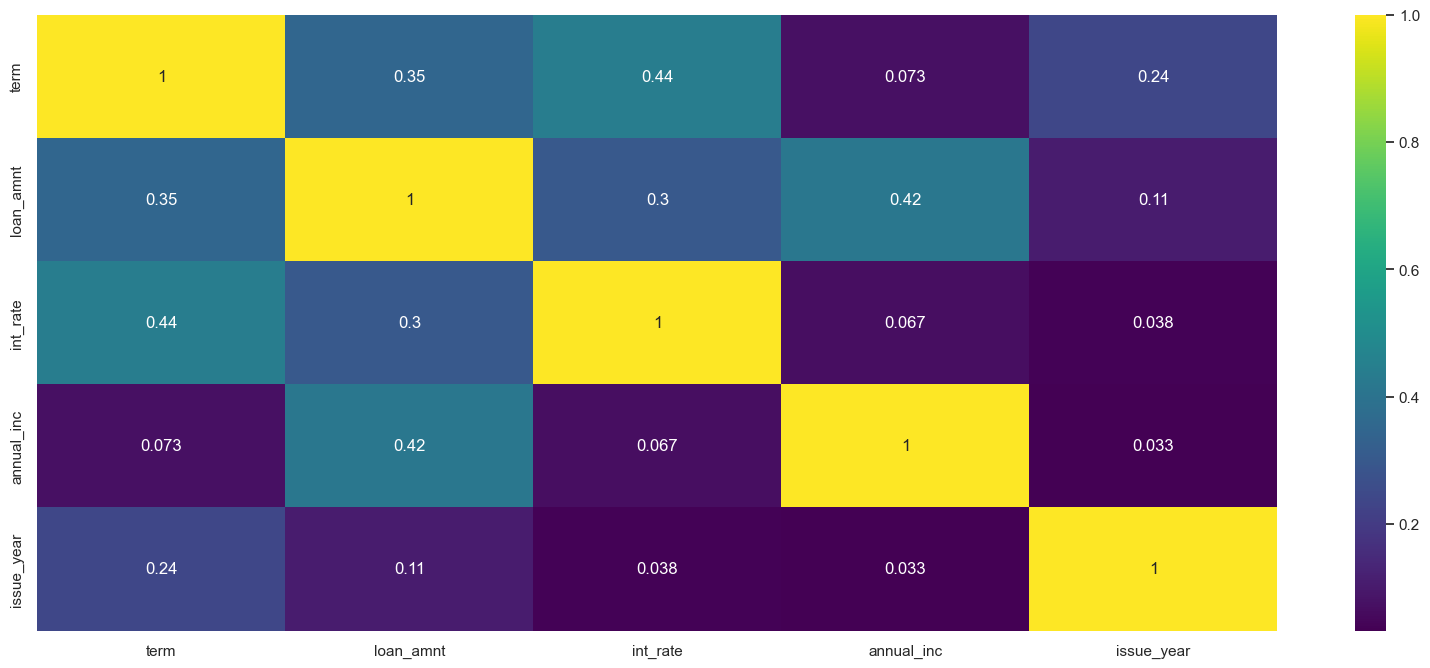

In [822]:
selected_variables = ['term', 'loan_amnt', 'int_rate', 'annual_inc', 'issue_year']
selected_df = df[selected_variables]
sns.heatmap(selected_df.corr(), annot=True, cmap='viridis')

##### Step 5.4.4 Annual income vs loan purpose

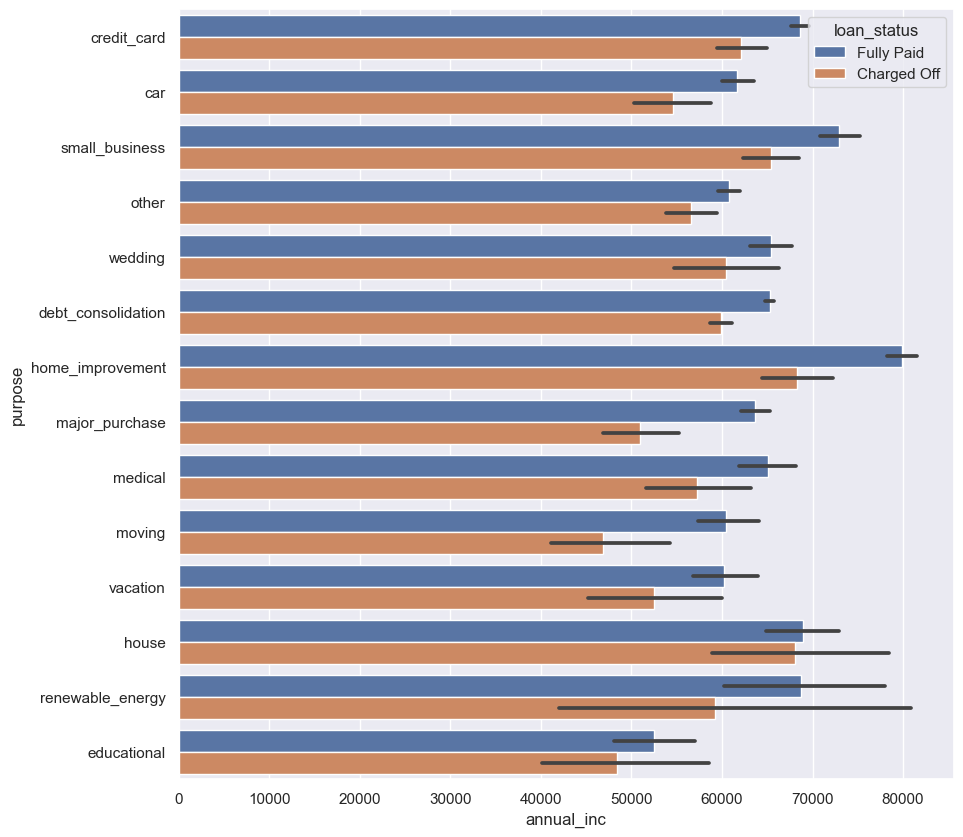

In [823]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

#### Step 5.4.5 Loan Amount Groups vs Interest rate

<Figure size 2000x800 with 0 Axes>

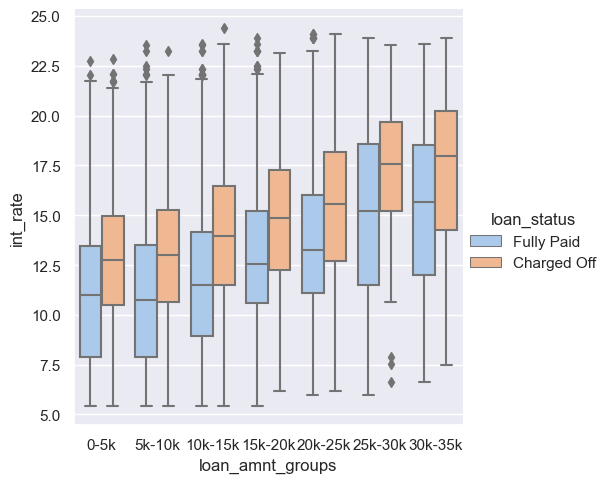

In [824]:
plt.tight_layout()
sns.catplot(data =df,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="pastel",kind = 'box')

#### Refer the attached ppt and read-me for findings

## ----------------- End ------------------